In [1]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pytrends 
!pip install psutil requests
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import re
from datetime import datetime
import time
from scipy.stats import spearmanr
import plotly.express as px
from scipy import stats
import nltk
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools as tls
import plotly.graph_objs as go
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from nltk import tokenize
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim import models
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
from google.colab import drive
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package o

True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_mev = pd.read_csv('/content/drive/MyDrive/mev.csv').drop(["Unnamed: 0"], axis =1)
df_mev

Date  \
0    2021-12-31 05:49:28+00:00   
1    2021-12-28 17:14:22+00:00   
2    2021-12-27 11:00:25+00:00   
3    2021-12-27 10:00:34+00:00   
4    2021-12-27 02:32:05+00:00   
..                         ...   
648  2018-04-25 14:27:16+00:00   
649  2018-04-09 11:00:21+00:00   
650  2018-04-07 11:35:12+00:00   
651  2018-03-31 13:15:06+00:00   
652  2018-03-12 22:24:45+00:00   

                                                Tweets  
0    This is what a sandwich attack looks like. The...  
1    ¿Sabías que en el mundo de las #DeFi existen e...  
2    [#IOTAQuicktakes] Let’s wrap up this year with...  
3    [#IOTAQuicktakes] Let’s wrap up this year with...  
4    What is Miner extractable value (#MEV) and how...  
..                                                 ...  
648  #CheamVillage - fun morning spent installing @...  
649  #AirPollution plays a role in many of the majo...  
650  Viatge d'incognit a #Catalunya #padepassíc #ME...  
651     @MehwishHayat #mev Congrats.. u nailed it.. 😘😘  
652  #MEV #FueroPenal | A partir de hoy se encuentr...  

[653 rows x 2 columns]

In [5]:
df_flashbots = pd.read_csv('/content/drive/MyDrive/flashbots.csv').drop(["Unnamed: 0"], axis =1)
df_flashbots

Date  \
0    2021-12-31 10:36:24+00:00   
1    2021-12-27 18:37:50+00:00   
2    2021-12-26 06:41:29+00:00   
3    2021-12-18 16:36:53+00:00   
4    2021-12-13 15:11:25+00:00   
..                         ...   
221  2021-03-19 23:48:43+00:00   
222  2021-03-19 17:31:54+00:00   
223  2021-03-19 17:26:18+00:00   
224  2021-03-18 18:30:14+00:00   
225  2021-03-17 19:57:33+00:00   

                                                Tweets  
0    Support new artist, help us grow!! Shill the S...  
1    Support new artist, help us grow!! Shill the S...  
2    Support new artist, help us grow!! Shill the S...  
3    Support new artist, help us grow!! Shill the S...  
4    Tech blog article by @arpaofficial cryptograph...  
..                                                 ...  
221  #Flashbots is your "Portal" in the Dark Forest...  
222  Checkout my insights on the growth and utility...  
223  🚀 @OurNetwork__ #63 just dropped\n\n📈 -- get t...  
224  Announcing this week's @OurNetwork__ lineup 🚀\...  
225  Thrilled to announce #FlashBots will be covere...  

[226 rows x 2 columns]

## Data cleaning

1) Remove punctuation 

2) Convert the titles to lowercase 

In [6]:
def clean_data(df):
  df['paper_text_processed'] = \
  df['Tweets'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
  df['paper_text_processed'] = \
  df['paper_text_processed'].map(lambda x: x.lower())
  return df

<input>:2: DeprecationWarning:

invalid escape sequence \.

<input>:2: DeprecationWarning:

invalid escape sequence \.

<input>:2: DeprecationWarning:

invalid escape sequence \.

<ipython-input-6-7d9652e4ffc4>:2: DeprecationWarning:

invalid escape sequence \.



In [7]:
df_mev2=clean_data(df_mev)
df_flashbots=clean_data(df_flashbots)

In [8]:
df_mev2

Date  \
0    2021-12-31 05:49:28+00:00   
1    2021-12-28 17:14:22+00:00   
2    2021-12-27 11:00:25+00:00   
3    2021-12-27 10:00:34+00:00   
4    2021-12-27 02:32:05+00:00   
..                         ...   
648  2018-04-25 14:27:16+00:00   
649  2018-04-09 11:00:21+00:00   
650  2018-04-07 11:35:12+00:00   
651  2018-03-31 13:15:06+00:00   
652  2018-03-12 22:24:45+00:00   

                                                Tweets  \
0    This is what a sandwich attack looks like. The...   
1    ¿Sabías que en el mundo de las #DeFi existen e...   
2    [#IOTAQuicktakes] Let’s wrap up this year with...   
3    [#IOTAQuicktakes] Let’s wrap up this year with...   
4    What is Miner extractable value (#MEV) and how...   
..                                                 ...   
648  #CheamVillage - fun morning spent installing @...   
649  #AirPollution plays a role in many of the majo...   
650  Viatge d'incognit a #Catalunya #padepassíc #ME...   
651     @MehwishHayat #mev Congrats.. u nailed it.. 😘😘   
652  #MEV #FueroPenal | A partir de hoy se encuentr...   

                                  paper_text_processed  
0    this is what a sandwich attack looks like they...  
1    ¿sabías que en el mundo de las #defi existen e...  
2    [#iotaquicktakes] let’s wrap up this year with...  
3    [#iotaquicktakes] let’s wrap up this year with...  
4    what is miner extractable value (#mev) and how...  
..                                                 ...  
648  #cheamvillage - fun morning spent installing @...  
649  #airpollution plays a role in many of the majo...  
650  viatge d'incognit a #catalunya #padepassíc #me...  
651         @mehwishhayat #mev congrats u nailed it 😘😘  
652  #mev #fueropenal | a partir de hoy se encuentr...  

[653 rows x 3 columns]

## Time series

###Average Tweet Length & Volume


1) Calculate Tweet Volume by date

2) Calculate Average Tweet Length by Date

In [9]:
def ts_tweet(df):
  df['len'] = df['paper_text_processed'].str.split().str.len()
  df["Date"]=pd.to_datetime(df["Date"],errors='coerce',utc=True)
  df["day"]=df["Date"].dt.date
  c=pd.DataFrame({'Tweet Counts' : df.groupby(by=["day"])["Tweets"].count()}).reset_index()
  tweet_volume=c["Tweet Counts"].values.tolist()
  a=pd.DataFrame({'Tweet Length' : df.groupby(by=["day"])["len"].mean()}).reset_index()
  tweet_len=a["Tweet Length"].values.tolist()
  return tweet_len, tweet_volume, df

For mev

In [10]:
tweet_len_mev2, tweet_volume_mev2, df_mev2 = ts_tweet(df_mev2)[0], ts_tweet(df_mev2)[1], ts_tweet(df_mev2)[2]
del tweet_len_mev2[0:2]
del tweet_volume_mev2[0:2]

In [11]:
tweet_volume_mev2

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 14,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 8,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 10,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 5,
 1,
 1,
 1,
 3,
 4,
 6,
 8,
 2,
 2,
 5,
 3,
 1,
 1,
 3,
 5,
 4,
 3,
 2,
 1,
 3,
 2,
 1,
 1,
 5,
 1,
 2,
 3,
 1,
 2,
 4,
 1,
 1,
 7,
 2,
 3,
 4,
 3,
 3,
 2,
 3,
 4,
 6,
 3,
 3,
 2,
 2,
 2,
 3,
 4,
 

For flashbots

In [12]:
tweet_len_flashbots, tweet_volume_flashbots, df_flashbots = ts_tweet(df_flashbots)[0], ts_tweet(df_flashbots)[1], ts_tweet(df_flashbots)[2]
del tweet_len_flashbots[0:2]
del tweet_volume_flashbots[0:2]

In [13]:
tweet_volume_flashbots

[3,
 2,
 1,
 1,
 1,
 1,
 2,
 5,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 7,
 2,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 8,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 4,
 2,
 4,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 6,
 5,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [14]:
tweet_len_flashbots

[20.666666666666668,
 37.5,
 42.0,
 34.0,
 19.0,
 49.0,
 35.0,
 30.0,
 33.5,
 20.0,
 8.0,
 26.0,
 39.0,
 13.0,
 29.0,
 15.0,
 47.5,
 14.0,
 34.5,
 41.0,
 48.0,
 25.0,
 49.0,
 28.142857142857142,
 43.0,
 25.0,
 33.5,
 34.0,
 22.0,
 44.0,
 31.2,
 36.0,
 35.0,
 29.125,
 23.0,
 13.5,
 10.5,
 14.333333333333334,
 41.0,
 33.0,
 17.0,
 27.75,
 24.5,
 25.5,
 47.0,
 33.0,
 23.666666666666668,
 29.0,
 16.0,
 34.0,
 39.0,
 21.0,
 37.0,
 19.0,
 27.0,
 17.0,
 44.0,
 13.0,
 34.0,
 15.0,
 32.666666666666664,
 40.0,
 27.0,
 27.0,
 31.0,
 26.0,
 25.0,
 30.0,
 41.0,
 20.0,
 45.0,
 37.5,
 25.0,
 40.0,
 16.5,
 7.0,
 24.5,
 3.0,
 9.0,
 35.0,
 39.0,
 34.0,
 39.0,
 3.0,
 51.0,
 13.0,
 28.0,
 24.0,
 8.0,
 36.0,
 31.0,
 15.0,
 27.333333333333332,
 11.0,
 12.0,
 27.0,
 16.666666666666668,
 38.5,
 23.0,
 21.0,
 30.0,
 39.0,
 21.333333333333332,
 26.6,
 26.0,
 12.666666666666666,
 17.0,
 10.333333333333334,
 42.0,
 44.0,
 22.0,
 21.0,
 43.0,
 37.0,
 26.0,
 49.0,
 24.0,
 21.0,
 42.0,
 23.333333333333332,
 33.5,
 3

##Google Trend

In [15]:
def google_trend(keywords, date_interval):
  pytrend = TrendReq(tz=0)
  KEYWORDS=[keywords] 
  KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
  df_CODES= pd.DataFrame(KEYWORDS_CODES)
  EXACT_KEYWORDS=df_CODES['mid'].to_list()
  DATE_INTERVAL=date_interval
  COUNTRY=["US"] #Use this link for iso country code
  CATEGORY=0 # Use this link to select categories
  SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)
  Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
  Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
  dicti = {}
  i = 1
  for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
      pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
      dicti[i] = pytrend.interest_over_time()
      i+=1
  df_trends = pd.concat(dicti, axis=1)
  df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
  df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
  df_trends.reset_index(level=0,inplace=True) #reset_index
  df_trends.columns=['date','google trend'] #change column names
  return df_trends

For mev

In [16]:
df_trend_mev2_1=google_trend("MEV",'2008-04-01 2015-04-10')
df_trend_mev2_2=google_trend("MEV",'2015-04-11 2021-12-2')
df_trend_mev2_2["google trend new"]=""
for i in range(len(df_trend_mev2_2["google trend"])):
  df_trend_mev2_2["google trend new"][i]=round(df_trend_mev2_2["google trend"][i]*1/31)
df_trend_mev2_2 = df_trend_mev2_2.drop('google trend', axis = 1)
df_trend_mev2_2=df_trend_mev2_2.drop(index=[0])
df_trend_mev2_2["google trend"]=df_trend_mev2_2["google trend new"]
df_trend_mev2_2 = df_trend_mev2_2.drop('google trend new', axis = 1)
df_trend_mev2=pd.concat([df_trend_mev2_1,df_trend_mev2_2],axis=0,ignore_index=True)
df_trend_mev2["tweet_volume"]=pd.Series(tweet_volume_mev2)
df_trend_mev2["tweet_len"]=pd.Series(tweet_len_mev2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_trend_mev2_1

date  google trend
0  2008-04-01            83
1  2008-05-01            72
2  2008-06-01            70
3  2008-07-01            63
4  2008-08-01            66
..        ...           ...
80 2014-12-01            90
81 2015-01-01            88
82 2015-02-01            95
83 2015-03-01            87
84 2015-04-01            89

[85 rows x 2 columns]

In [18]:
df_trend_mev2_2

date google trend
1  2015-06-01            1
2  2015-07-01            1
3  2015-08-01            1
4  2015-09-01            1
5  2015-10-01            1
..        ...          ...
75 2021-08-01            1
76 2021-09-01            1
77 2021-10-01            1
78 2021-11-01            1
79 2021-12-01            1

[79 rows x 2 columns]

In [19]:
df_trend_mev2

date google trend  tweet_volume  tweet_len
0   2008-04-01           83             1       11.0
1   2008-05-01           72             1       47.0
2   2008-06-01           70             1       28.0
3   2008-07-01           63             1       20.0
4   2008-08-01           66             1       37.0
..         ...          ...           ...        ...
159 2021-08-01            1             2       45.5
160 2021-09-01            1             3       21.0
161 2021-10-01            1             2       27.5
162 2021-11-01            1             2       28.0
163 2021-12-01            1             1       51.0

[164 rows x 4 columns]

For flashbots

In [20]:
df_trend_flashbots=google_trend("flashbot",'2021-4-10 2022-12-1')#TBD 
df_trend_flashbots["tweet_volume"]=pd.Series(tweet_volume_flashbots)#pd.Series
df_trend_flashbots["tweet_len"]=pd.Series(tweet_len_flashbots)

In [21]:
df_trend_flashbots

date  google trend  tweet_volume  tweet_len
0  2021-04-11            23             3  20.666667
1  2021-04-18            23             2  37.500000
2  2021-04-25             0             1  42.000000
3  2021-05-02             0             1  34.000000
4  2021-05-09            24             1  19.000000
..        ...           ...           ...        ...
63 2022-06-26             0             1  27.000000
64 2022-07-03            23             1  31.000000
65 2022-07-10            22             1  26.000000
66 2022-07-17            22             1  25.000000
67 2022-07-24             0             3  30.000000

[68 rows x 4 columns]

In [22]:
df_trend_concat= pd.concat ([df_trend_mev2, df_trend_flashbots])
df_trend_concat=df_trend_concat.append({'date': datetime.datetime(2021, 1, 1), 'google trend': 0, 'tweet_volume': 0,'tweet_len': 0}, ignore_index=True)
df_trend_concat=df_trend_concat.append({'date': datetime.datetime(2021, 3, 14), 'google trend': 0, 'tweet_volume': 0,'tweet_len': 0}, ignore_index=True)
df_trend_concat=df_trend_concat.sort_values(by=['date'], ascending=True).reset_index().drop(["index"], axis = 1)
df_trend_concat

date google trend  tweet_volume  tweet_len
0   2008-04-01           83             1       11.0
1   2008-05-01           72             1       47.0
2   2008-06-01           70             1       28.0
3   2008-07-01           63             1       20.0
4   2008-08-01           66             1       37.0
..         ...          ...           ...        ...
229 2022-06-26            0             1       27.0
230 2022-07-03           23             1       31.0
231 2022-07-10           22             1       26.0
232 2022-07-17           22             1       25.0
233 2022-07-24            0             3       30.0

[234 rows x 4 columns]

##Spearman Correlation test

In [23]:
def spearman_corr(df_trends,names):
  coef, p = spearmanr(df_trends["tweet_volume"], df_trends["google trend"])
  print(names)
  print('Spearmans correlation coefficient: %.3f' % coef)
  print('P-value: %.3f' % p)

For mev tag

In [24]:
spearman_corr(df_trend_mev2,"mev")

mev
Spearmans correlation coefficient: -0.058
P-value: 0.460


For tag flahsbots

In [25]:
spearman_corr(df_trend_flashbots,"flashbot")

flashbot
Spearmans correlation coefficient: 0.133
P-value: 0.279


##Plot Average Tweet Length

In [26]:
trace1 = go.Scatter(x=df_trend_mev2["date"], y=df_trend_mev2["tweet_len"], name=" #mev")
trace2 = go.Scatter(x=df_trend_flashbots["date"], y=df_trend_flashbots["tweet_len"], name=" #flashbots")
trace3 = go.Scatter(x=df_trend_mev2["date"], y=[25.3]*len(df_trend_mev2["date"]), name="Mean",line=dict(color='blue', width=4,
                    dash='dash'))
trace4 = go.Scatter(x=df_trend_flashbots["date"], y=[25.0]*len(df_trend_flashbots["date"]), name="Mean",line=dict(color='firebrick', width=4,
                    dash='dash'))

fig = make_subplots(rows=2, cols=1,
                        print_grid=True,
                        horizontal_spacing=0.5,
                        vertical_spacing=0.3, subplot_titles=("for #mev2","for #flashbots")
                         )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 2, 1)

#fig.update_layout(trace1 = dict(range=[<from_value>, <to_value>]))
# Set x-axis title
fig.update_xaxes(title_text="Date",tickfont_size=13,)
fig.update_layout(xaxis1 = dict(range=["2020-05-24","2021-10-3"]))

# Set y-axes titles
fig.update_yaxes(title_text="No. of Words per Tweet", tickfont_size=13, secondary_y=False,range=[15,35])

This is the format of your plot grid:
[ (1,1) x,y   ]
[ (2,1) x2,y2 ]



/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




##Plot Google Trend & Tweet Volume

In [27]:
def figure_volume(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.show()

In [28]:
figure_volume(df_trend_mev2,"#mev")

In [29]:
figure_volume(df_trend_flashbots,"#flashbot")

In [30]:
def figure_volume_2(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.add_shape(type="line", x0=datetime.datetime(2021, 1, 1), y0=1, x1=datetime.datetime(2021, 3, 14), y1=1,line=dict(color="White",width=2.5,))
  fig.add_trace(go.Scatter(x=[datetime.datetime(2020, 10, 1),datetime.datetime(2020, 12, 1) ], y=[100000, 100000],name = "Time Series for MEV",
    text=["Time Series for #MEV",],mode="text",))
  fig.add_trace(go.Scatter(x=[datetime.datetime(2021, 8, 1),datetime.datetime(2021, 12, 1) ], y=[100000, 100000],name = "Time Series for flashbots",
    text=["Time Series for #flashbots",],mode="text",))
  fig.show()

In [31]:
figure_volume_2(df_trend_concat,"#MEV and #flashbots")

##Overall frequency

In [32]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu',"u","e","i鈥檓",'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df_mev2['tweet_without_stopwords'] = df_mev2["paper_text_processed"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_words)]))
df_flashbots['tweet_without_stopwords'] = df_flashbots["paper_text_processed"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_words)]))

In [34]:
tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    dfFrequency=dfFrequency.reset_index().reset_index()
    return dfFrequency

In [35]:
df1=counter(df_mev2, 'tweet_without_stopwords', 20)
df2=counter(df_flashbots, 'tweet_without_stopwords', 20)

###Plot the wordcount graph

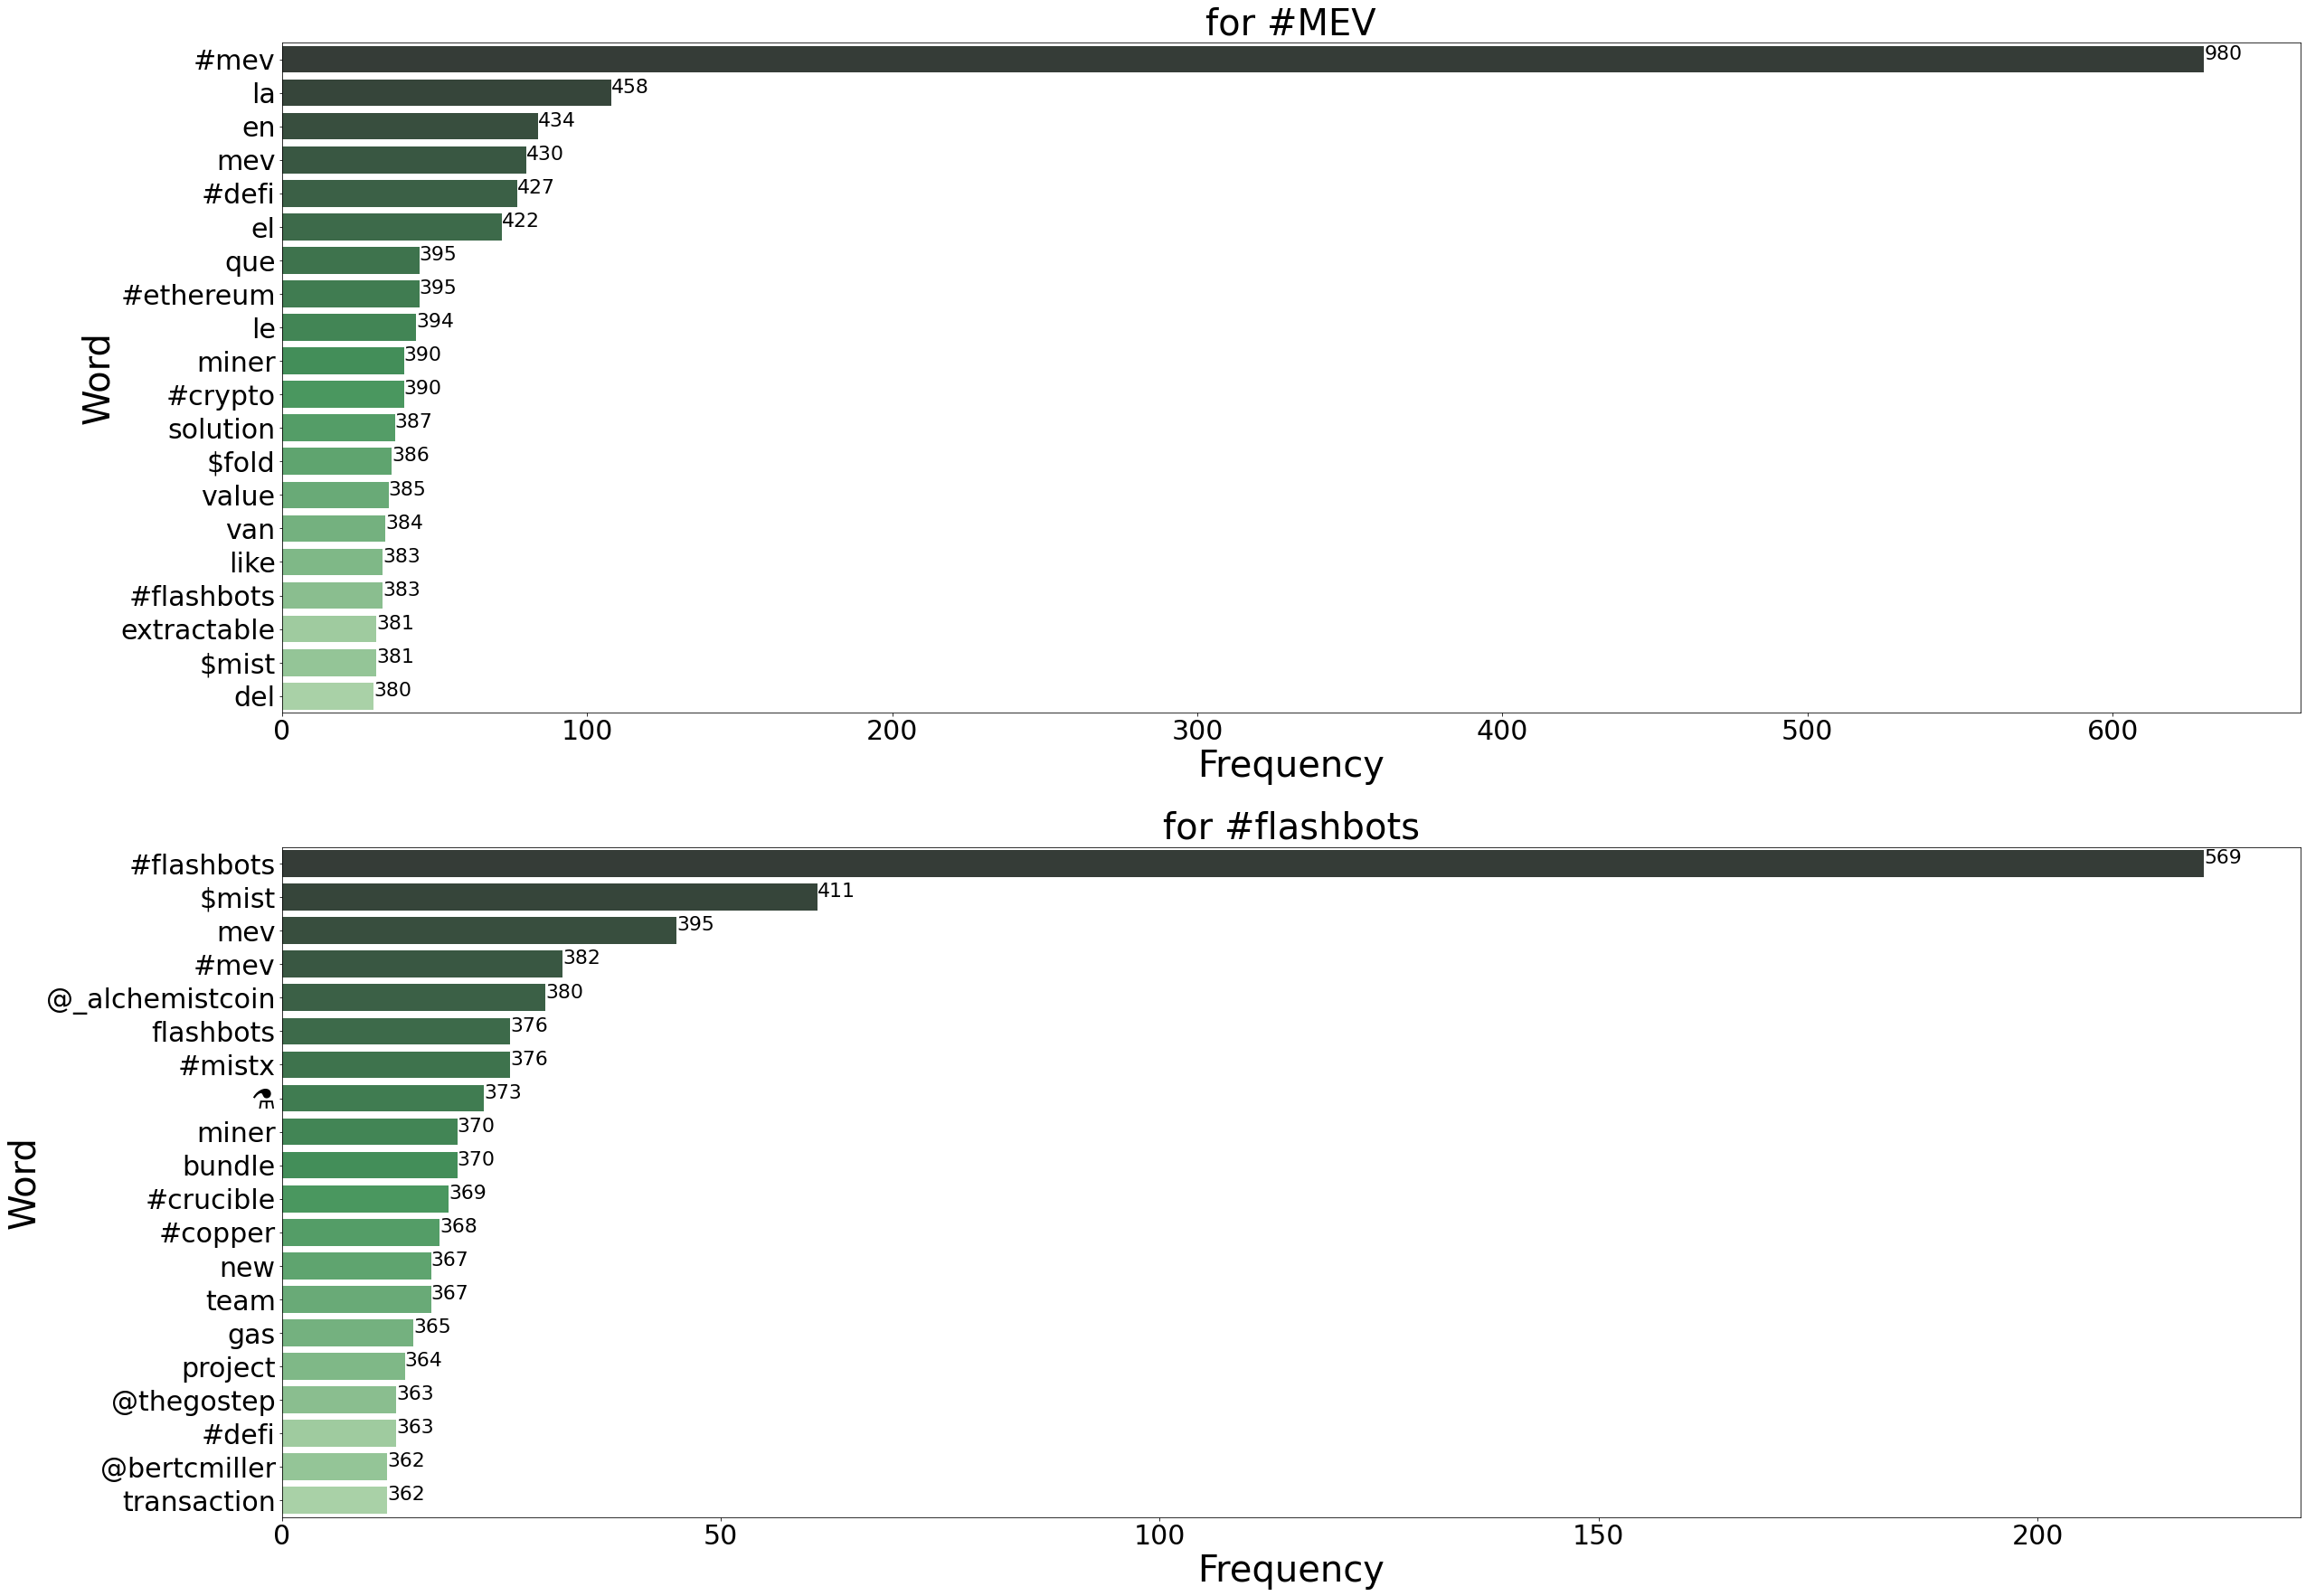

In [36]:
ig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #MEV',fontsize=40)
axs[1].set_title('for #flashbots',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(df1["Frequency"]))
rank1 = df1["Frequency"].argsort().argsort()
ax1=sns.barplot(data =df1, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])

for index, row in df1.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(df2["Frequency"]))
rank2 = df2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =df2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank1], ax=axs[1])

for index, row in df2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()


##Word Cloud

In [37]:
# Join the different processed titles together.
long_string = ','.join(list(df_flashbots['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))

#nltk.download('stopwords')
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

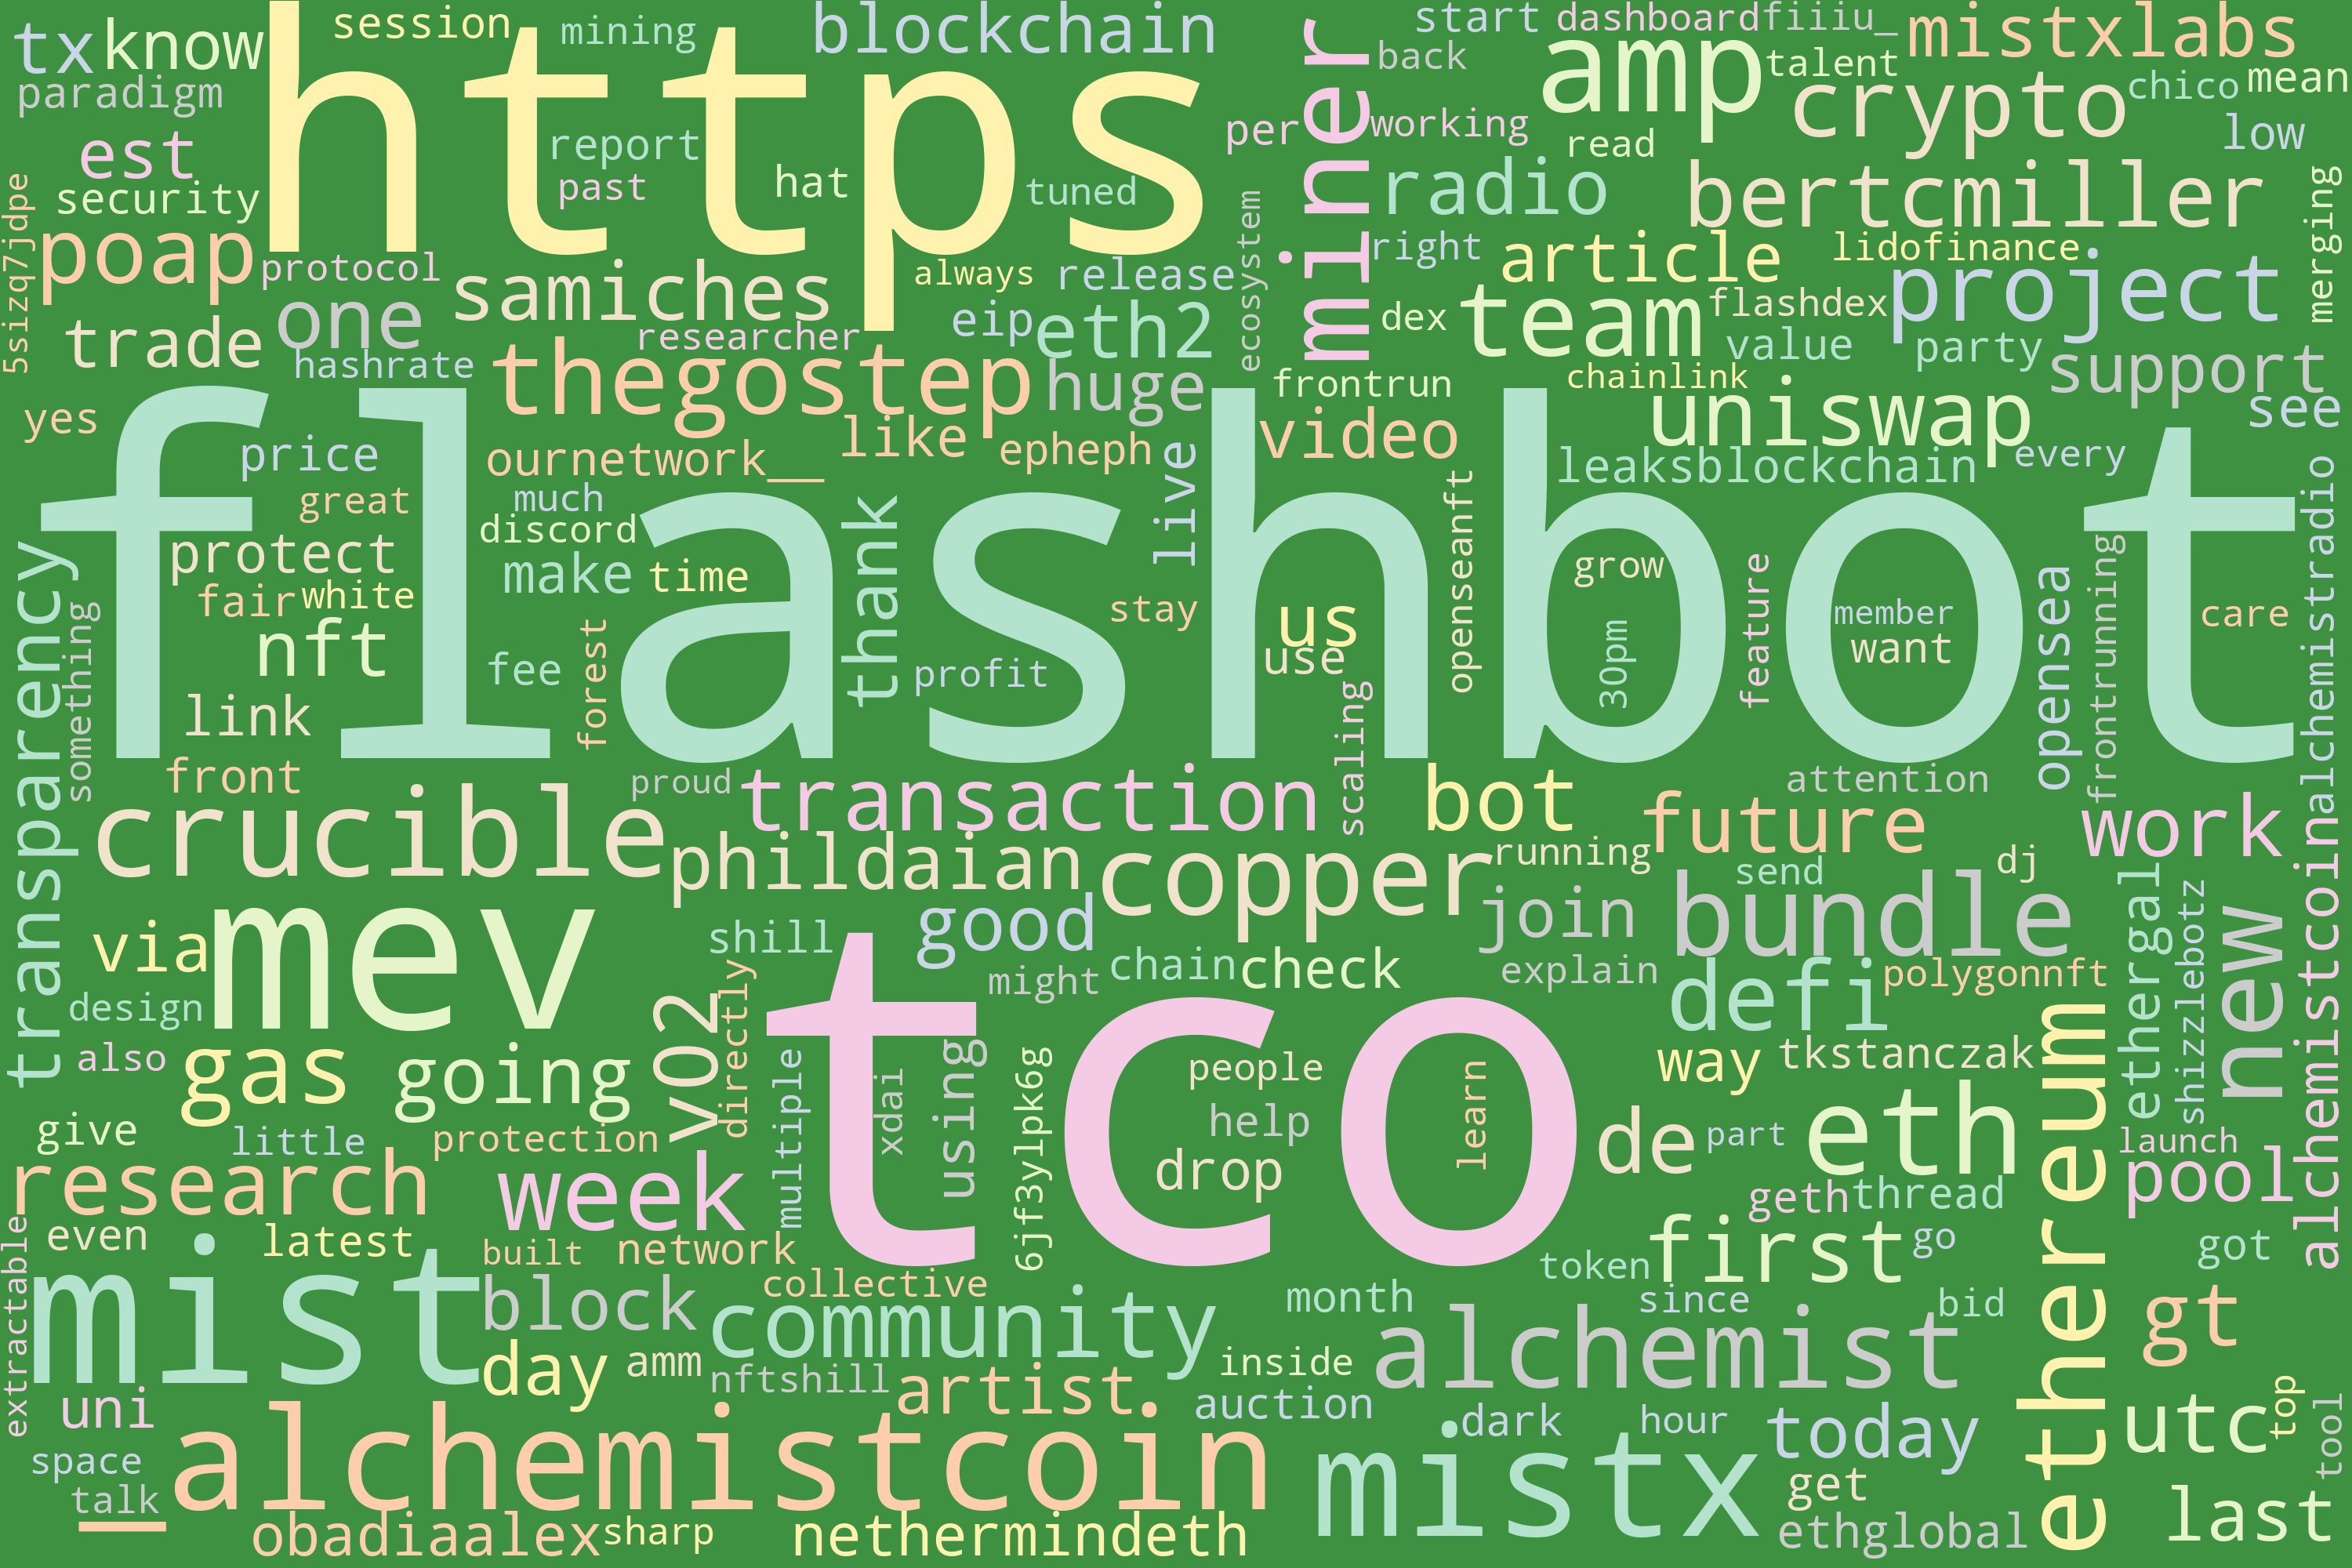

In [38]:
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False).generate(long_string)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [39]:
long_string = ','.join(list(df_mev2['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


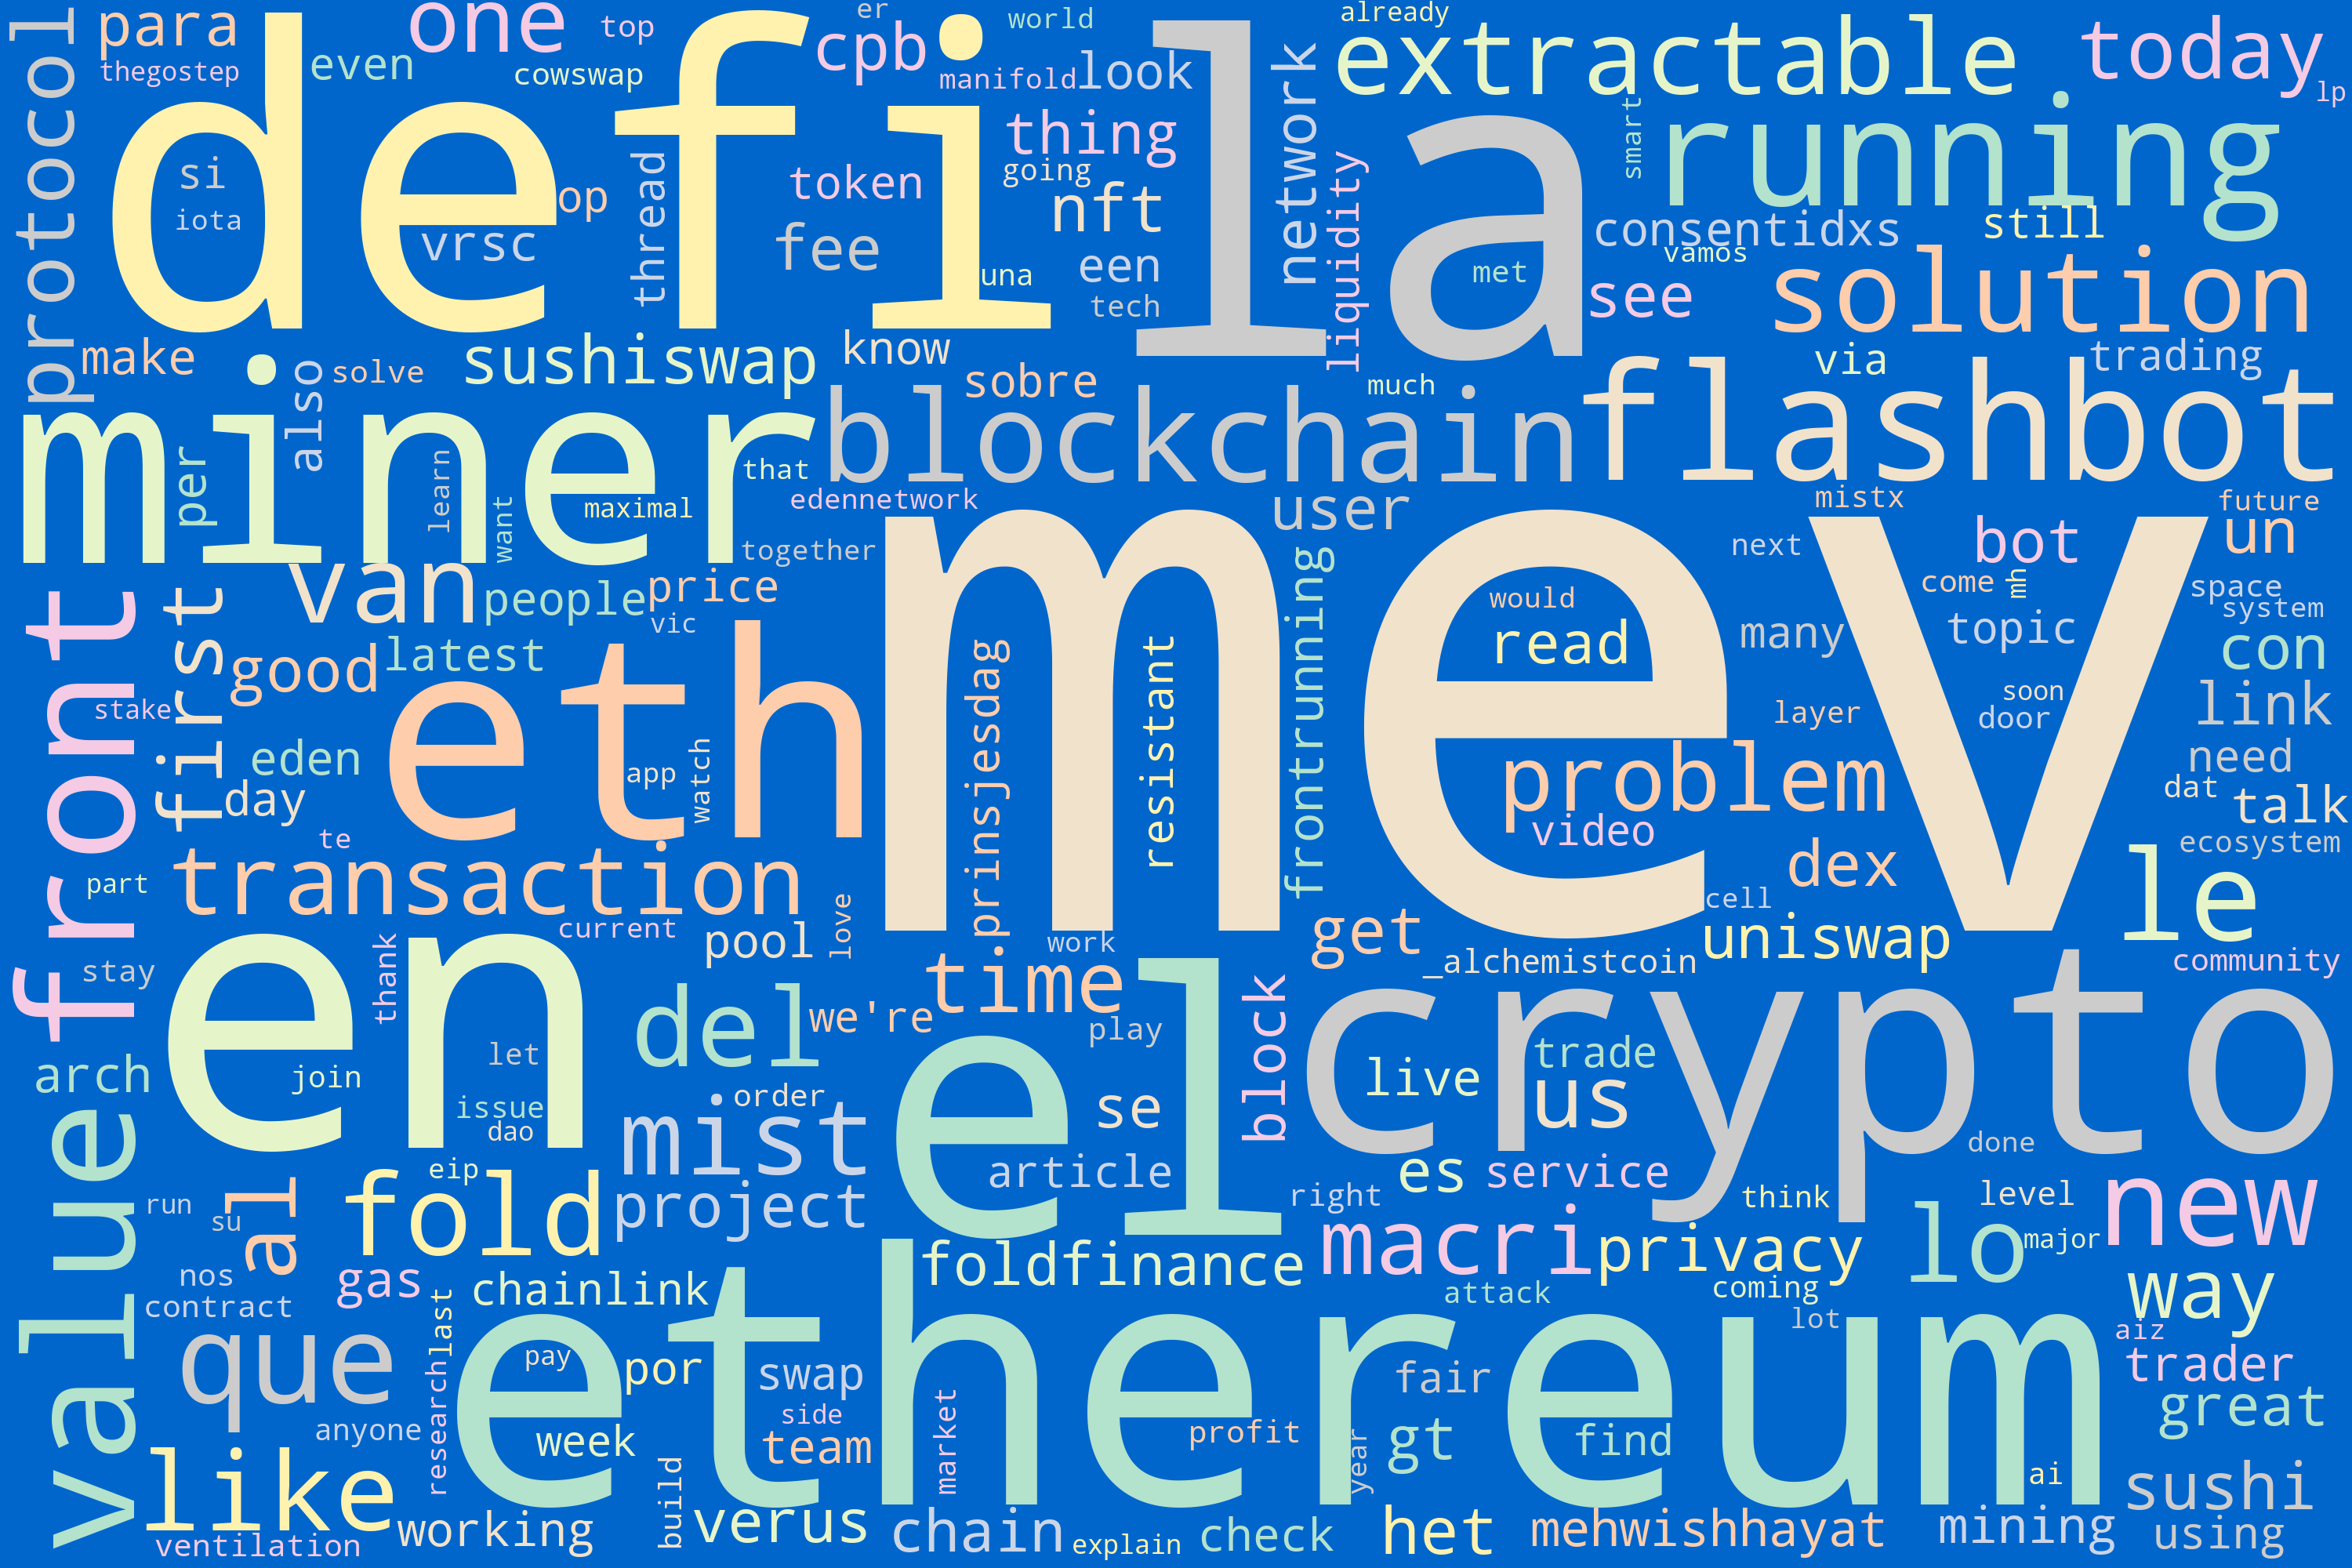

In [40]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

###LDA analysis for tag mev & flashbots

In [41]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_flashbots.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['support', 'new', 'artist', 'help', 'us', 'grow', 'shill', 'shizzlebotz', 'nftshill', 'polygonnft', 'flashbots', 'sizq', 'jdpe', 'opensea', 'openseanft']


In [42]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [43]:
def lda(corpus,id2word,num_topics):
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics, random_state=100)
  # Print the Keyword 
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  
  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  return doc_lda

Topic is 1

In [44]:
lda(corpus, id2word, 1)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.042*"flashbots" + 0.014*"mev" + 0.011*"mist" + 0.006*"mistx" + '
  '0.006*"eth" + 0.004*"crucible" + 0.004*"ethereum" + 0.003*"copper" + '
  '0.003*"new" + 0.003*"alchemist"')]

Coherence Score:  0.3030077041694817


In [45]:
print(df_mev2['tweet_without_stopwords'])

0      sandwich attack look like they're common low c...
1      ¿sabías que en el mundo la #defi existen estra...
2      [#iotaquicktakes] let’s wrap year recap latest...
3      [#iotaquicktakes] let’s wrap year recap latest...
4      miner extractable value (#mev) people (or flas...
                             ...                        
648    #cheamvillage fun morning spent installing @uk...
649    #airpollution play role many major #health cha...
650    viatge d'incognit #catalunya #padepassíc #mev ...
651                @mehwishhayat #mev congrats nailed 😘😘
652    #mev #fueropenal | partir hoy se encuentra dis...
Name: tweet_without_stopwords, Length: 653, dtype: object


###When is 5

In [46]:
from pprint import pprint

# number of topics
num_topics =5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.054*"flashbots" + 0.015*"mev" + 0.012*"mist" + 0.008*"mistx" + '
  '0.007*"new" + 0.004*"bertcmiller" + 0.004*"support" + 0.004*"uniswap" + '
  '0.004*"opensea" + 0.004*"bundles"'),
 (1,
  '0.038*"flashbots" + 0.008*"mev" + 0.007*"last" + 0.006*"mist" + '
  '0.006*"mistx" + 0.005*"ethereum" + 0.005*"eth" + 0.004*"work" + '
  '0.004*"future" + 0.004*"team"'),
 (2,
  '0.039*"flashbots" + 0.018*"mist" + 0.015*"mev" + 0.008*"mistx" + '
  '0.007*"crypto" + 0.006*"alchemist" + 0.005*"eth" + 0.005*"crucible" + '
  '0.005*"uniswap" + 0.004*"ethereum"'),
 (3,
  '0.043*"flashbots" + 0.012*"mev" + 0.011*"mist" + 0.010*"eth" + '
  '0.006*"crucible" + 0.006*"miners" + 0.006*"mistx" + 0.005*"copper" + '
  '0.004*"poap" + 0.004*"thegostep"'),
 (4,
  '0.034*"flashbots" + 0.022*"mev" + 0.009*"mist" + 0.006*"gas" + 0.006*"eth" '
  '+ 0.005*"defi" + 0.004*"gt" + 0.004*"research" + 0.003*"blockchain" + '
  '0.003*"price"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [47]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.101451 -0.031142       1        1  25.327043
3     -0.051245 -0.076184       2        1  23.953633
2     -0.021960  0.040145       3        1  19.641515
4      0.011138  0.055082       4        1  15.729084
1     -0.039384  0.012100       5        1  15.348725, topic_info=         Term       Freq      Total Category  logprob  loglift
305      last   5.000000   5.000000  Default  30.0000  30.0000
261    crypto   8.000000   8.000000  Default  29.0000  29.0000
30        mev  58.000000  58.000000  Default  28.0000  28.0000
248   uniswap   9.000000   9.000000  Default  27.0000  27.0000
7     opensea   4.000000   4.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
342        pm   1.775782   7.898839   Topic5  -5.8583   0.3817
353     radio   1.471192   6.581558   Topic5  -6.0465   0.3759
343      poap   1.504058   9.331769   Topic5  -6.0244   0.0489
159       one   1.472976   7.330370   Topic5  -6.0453   0.2694
336  crucible   1.482949  16.014415   Topic5  -6.0385  -0.5053

[340 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1373      5  0.787480      abfbv
703       3  0.508911   absolute
1030      5  0.787479        air
880       4  0.793479         al
251       1  0.080632  alchemist
...     ...       ...        ...
133       2  0.309071    working
133       5  0.618142    working
774       3  0.508121      world
1234      2  0.503623        yes
1234      3  0.503623        yes

[481 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 2])

###When is 10

In [48]:
from pprint import pprint

# number of topics
num_topics =10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.040*"flashbots" + 0.016*"mev" + 0.007*"opensea" + 0.006*"new" + '
  '0.006*"artist" + 0.006*"support" + 0.006*"shill" + 0.006*"grow" + '
  '0.006*"openseanft" + 0.006*"us"'),
 (1,
  '0.030*"flashbots" + 0.007*"bundles" + 0.007*"mev" + 0.006*"thanks" + '
  '0.006*"last" + 0.005*"copper" + 0.005*"one" + 0.005*"ethergal" + '
  '0.005*"next" + 0.005*"future"'),
 (2,
  '0.036*"flashbots" + 0.012*"mist" + 0.009*"ethereum" + 0.009*"mev" + '
  '0.006*"trade" + 0.006*"eh" + 0.006*"mistxlabs" + 0.005*"crypto" + '
  '0.005*"via" + 0.004*"join"'),
 (3,
  '0.036*"flashbots" + 0.010*"mist" + 0.009*"mev" + 0.006*"new" + 0.006*"week" '
  '+ 0.004*"fluid" + 0.004*"lidofinance" + 0.004*"research" + 0.004*"eth" + '
  '0.004*"show"'),
 (4,
  '0.027*"flashbots" + 0.013*"mist" + 0.011*"mev" + 0.008*"gas" + 0.008*"eth" '
  '+ 0.007*"price" + 0.005*"send" + 0.004*"year" + 0.004*"adoption" + '
  '0.004*"almost"'),
 (5,
  '0.035*"flashbots" + 0.014*"mev" + 0.008*"team" + 0.007*"crypto" + '
  '0.006*"e

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [49]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [50]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.029178  0.063835       1        1  23.902709
9     -0.146996 -0.023500       2        1  15.602724
0      0.080295 -0.128900       3        1  10.392023
2      0.018879  0.030033       4        1   7.878617
7     -0.047148 -0.038383       5        1   7.797808
3      0.022595 -0.007590       6        1   7.731608
6     -0.037724  0.001278       7        1   7.374003
5      0.071877  0.031498       8        1   7.174523
4      0.008204  0.074925       9        1   6.806147
1      0.000841 -0.003195      10        1   5.339838, topic_info=         Term       Freq      Total Category  logprob  loglift
336  crucible  15.000000  15.000000  Default  30.0000  30.0000
256     mistx  26.000000  26.000000  Default  29.0000  29.0000
335    copper  13.000000  13.000000  Default  28.0000  28.0000
343      poap   9.000000   9.000000  Default  27.0000  27.0000
353     radio   6.000000   6.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
353     radio   0.617735   6.081846  Topic10  -5.8584   0.6430
336  crucible   0.592580  15.884850  Topic10  -5.9000  -0.3587
256     mistx   0.591812  26.030077  Topic10  -5.9013  -0.8538
348       utc   0.576311   8.102726  Topic10  -5.9279   0.2867
343      poap   0.575905   9.616153  Topic10  -5.9286   0.1147

[608 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1373     10  0.867397        abfbv
1986      7  0.803470  abstraction
1302      4  0.790597       acabei
1987      7  0.803469      account
1879      9  0.824168     accurate
...     ...       ...          ...
1244      8  0.832015        xtuba
935       9  0.557614         year
1234      1  0.256589          yes
1234      8  0.513178          yes
2000      7  0.803469          zba

[852 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 1, 3, 8, 4, 7, 6, 5, 2])

###When is 15

In [51]:
from pprint import pprint

# number of topics
num_topics =15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.047*"flashbots" + 0.010*"mev" + 0.008*"bertcmiller" + 0.007*"mist" + '
  '0.007*"us" + 0.005*"shill" + 0.005*"nftshill" + 0.005*"thread" + '
  '0.005*"grow" + 0.005*"support"'),
 (1,
  '0.041*"flashbots" + 0.014*"future" + 0.011*"bundles" + 0.007*"ethergal" + '
  '0.007*"thanks" + 0.007*"next" + 0.006*"mist" + 0.005*"mev" + 0.005*"first" '
  '+ 0.004*"wkoq"'),
 (2,
  '0.030*"flashbots" + 0.014*"mist" + 0.007*"ethglobal" + 0.007*"ethereum" + '
  '0.007*"join" + 0.007*"talent" + 0.007*"people" + 0.006*"mev" + '
  '0.006*"crucible" + 0.005*"eh"'),
 (3,
  '0.042*"flashbots" + 0.020*"mev" + 0.008*"bots" + 0.008*"obadiaalex" + '
  '0.007*"mist" + 0.006*"attention" + 0.006*"team" + 0.006*"article" + '
  '0.006*"dark" + 0.005*"roast"'),
 (4,
  '0.027*"flashbots" + 0.017*"gas" + 0.014*"mist" + 0.011*"eth" + '
  '0.010*"price" + 0.010*"mev" + 0.007*"adoption" + 0.007*"topic" + '
  '0.007*"going" + 0.007*"tonight"'),
 (5,
  '0.045*"flashbots" + 0.021*"mev" + 0.011*"mist" + 0.011*"yes" +

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [52]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.150753 -0.073906       1        1  18.466346
9      0.094936 -0.130327       2        1  11.232673
0      0.031834  0.137999       3        1  10.418367
7      0.104202 -0.021170       4        1   8.871734
13     0.014169 -0.046004       5        1   6.063322
5     -0.077035 -0.003364       6        1   5.948373
11    -0.003051  0.031101       7        1   5.412715
3     -0.026382  0.019538       8        1   5.362189
2      0.018717  0.006121       9        1   4.649887
10    -0.032359  0.052553      10        1   4.603450
14     0.058750  0.021391      11        1   4.473370
12    -0.022811  0.012912      12        1   4.348531
4     -0.036627 -0.014006      13        1   4.095809
1      0.015497  0.017425      14        1   3.379894
6      0.010914 -0.010261      15        1   2.673340, topic_info=           Term        Freq       Total Category  logprob  loglift
256       mistx   26.000000   26.000000  Default  30.0000  30.0000
255        mist   46.000000   46.000000  Default  29.0000  29.0000
1     flashbots  176.000000  176.000000  Default  28.0000  28.0000
30          mev   61.000000   61.000000  Default  27.0000  27.0000
1012        gas   10.000000   10.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
480       token    0.537701    2.947219  Topic15  -5.3053   1.9205
30          mev    0.713535   61.267016  Topic15  -5.0224  -0.8309
590    ethereum    0.477284   14.930336  Topic15  -5.4245   0.1788
300      thanks    0.453442    4.764745  Topic15  -5.4758   1.2697
320     discord    0.453178    3.012854  Topic15  -5.4763   1.7275

[871 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1373     14  0.916501          abfbv
703       4  0.503617       absolute
703       9  0.503617       absolute
559       1  0.690620       absorbed
1986     11  0.871500    abstraction
...     ...       ...            ...
2000     11  0.871500            zba
2001     11  0.871500           zfme
1222      2  0.694052  ziggycoindust
726       4  0.745276           zqlg
731       9  0.790290         zwaorp

[1173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 1, 8, 14, 6, 12, 4, 3, 11, 15, 13, 5, 2, 7])

###When is 20

In [53]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.043*"flashbots" + 0.017*"mev" + 0.009*"bundles" + 0.008*"new" + '
  '0.008*"shizzlebotz" + 0.008*"mist" + 0.008*"jit" + 0.008*"us" + '
  '0.008*"support" + 0.008*"sizq"'),
 (1,
  '0.025*"flashbots" + 0.014*"bundles" + 0.009*"thanks" + 0.009*"mistx" + '
  '0.009*"mist" + 0.007*"ftuwj" + 0.007*"sending" + 0.007*"shoutout" + '
  '0.007*"sch" + 0.007*"care"'),
 (2,
  '0.035*"flashbots" + 0.024*"mist" + 0.016*"mev" + 0.009*"mistx" + '
  '0.008*"miner" + 0.008*"ethglobal" + 0.007*"eh" + 0.007*"trade" + 0.006*"go" '
  '+ 0.005*"today"'),
 (3,
  '0.035*"flashbots" + 0.008*"mev" + 0.008*"bots" + 0.008*"seems" + '
  '0.007*"show" + 0.007*"miners" + 0.005*"community" + 0.005*"lidofinance" + '
  '0.005*"transparency" + 0.004*"defi"'),
 (4,
  '0.031*"flashbots" + 0.011*"mist" + 0.010*"mev" + 0.007*"lidofinance" + '
  '0.007*"going" + 0.006*"eth" + 0.006*"real" + 0.006*"tonight" + '
  '0.006*"gonna" + 0.006*"time"'),
 (5,
  '0.044*"flashbots" + 0.027*"mev" + 0.011*"mist" + 0.010*"mistx" + 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [54]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.132911  0.157833       1        1  15.510990
9     -0.079223  0.101580       2        1  10.585957
5     -0.141719  0.019983       3        1   8.027667
7      0.006750  0.067939       4        1   6.242047
11     0.016142  0.033710       5        1   5.721182
15     0.003362 -0.037351       6        1   4.891912
12     0.001827 -0.058588       7        1   4.816946
0      0.052590 -0.017464       8        1   4.744569
13    -0.056733  0.053531       9        1   4.297778
16     0.060967 -0.054746      10        1   4.279543
3      0.084344 -0.024151      11        1   4.120911
2     -0.003164  0.010612      12        1   4.024170
17    -0.012154 -0.063966      13        1   3.968807
18     0.038182 -0.022435      14        1   3.808816
4      0.054973 -0.070604      15        1   3.578513
19    -0.036619 -0.035114      16        1   3.572738
10    -0.030202 -0.018333      17        1   2.998977
14    -0.066567 -0.001870      18        1   2.054951
6     -0.009108 -0.024173      19        1   1.843625
1     -0.016560 -0.016392      20        1   0.909899, topic_info=          Term        Freq       Total Category  logprob  loglift
255       mist   45.000000   45.000000  Default  30.0000  30.0000
256      mistx   25.000000   25.000000  Default  29.0000  29.0000
1    flashbots  177.000000  177.000000  Default  28.0000  28.0000
336   crucible   15.000000   15.000000  Default  27.0000  27.0000
176         gt    8.000000    8.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
256      mistx    0.334359   25.763890  Topic20  -4.7027   0.3551
255       mist    0.318261   45.545363  Topic20  -4.7520  -0.2640
342         pm    0.164518    7.770371  Topic20  -5.4119   0.8445
343       poap    0.132108    9.404887  Topic20  -5.6313   0.4342
305       last    0.109834    5.690746  Topic20  -5.8159   0.7520

[1110 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
372      12  0.794810          ab
697       4  0.726131  abergoeedz
1373      9  0.847596       abfbv
1420      1  0.449723        able
1896      6  0.782396      actual
...     ...       ...         ...
1419     17  0.829223       ysxtj
371      13  0.804767       yters
448      17  0.829223         yus
427      10  0.780231         zts
422       8  0.754909        共同创作

[1359 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 6, 8, 12, 16, 13, 1, 14, 17, 4, 3, 18, 19, 5, 20, 11, 15, 7, 2])

###When is 25

In [55]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(15,
  '0.044*"flashbots" + 0.018*"mist" + 0.017*"eth" + 0.013*"mev" + '
  '0.013*"alchemist" + 0.009*"tx" + 0.007*"test" + 0.007*"solved" + '
  '0.007*"team" + 0.007*"crypto"'),
 (22,
  '0.041*"flashbots" + 0.012*"paradigm" + 0.011*"mev" + 0.010*"team" + '
  '0.010*"mist" + 0.010*"token" + 0.009*"work" + 0.008*"huge" + '
  '0.008*"frontrunning" + 0.008*"eth"'),
 (6,
  '0.026*"flashbots" + 0.018*"mist" + 0.012*"bundles" + 0.008*"today" + '
  '0.007*"mev" + 0.007*"copper" + 0.007*"mistx" + 0.007*"little" + '
  '0.007*"something" + 0.007*"djs"'),
 (0,
  '0.039*"flashbots" + 0.014*"mev" + 0.008*"mist" + 0.008*"one" + 0.008*"bad" '
  '+ 0.008*"mistxlabs" + 0.008*"ethergals" + 0.008*"thread" + 0.008*"little" + '
  '0.008*"protecc"'),
 (8,
  '0.048*"flashbots" + 0.035*"mev" + 0.017*"eth" + 0.010*"gas" + '
  '0.010*"ethereum" + 0.010*"miners" + 0.007*"even" + 0.007*"way" + '
  '0.007*"mistx" + 0.006*"mist"'),
 (1,
  '0.029*"flashbots" + 0.010*"pos" + 0.009*"supportive" + 0.008*"side" + '
  '

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [56]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.190421  0.028255       1        1  8.572822
8      0.072494 -0.141139       2        1  7.852927
11    -0.006711 -0.140081       3        1  6.096047
7      0.100164 -0.022656       4        1  5.544756
4     -0.097358  0.045521       5        1  5.035993
21    -0.000308 -0.048136       6        1  4.889267
3      0.012451 -0.049906       7        1  4.647292
16    -0.042742  0.039403       8        1  4.619061
15     0.037703 -0.021828       9        1  4.617059
13     0.114591  0.068763      10        1  4.577108
18    -0.088803 -0.085925      11        1  4.468408
19     0.003137  0.092605      12        1  3.924144
0      0.008510  0.081450      13        1  3.899670
5     -0.013092  0.014004      14        1  3.880022
10    -0.046266 -0.007325      15        1  3.629133
14     0.027090  0.015975      16        1  3.156349
17    -0.035429 -0.007829      17        1  2.953542
12    -0.059315  0.002780      18        1  2.944460
22    -0.035981  0.011102      19        1  2.869181
23     0.012769  0.007699      20        1  2.802516
6      0.027353  0.024101      21        1  2.387265
2     -0.055463  0.016490      22        1  2.337709
1     -0.037141  0.029591      23        1  1.667834
24    -0.065645  0.017508      24        1  1.351720
20    -0.022429  0.029577      25        1  1.275714, topic_info=               Term       Freq      Total Category  logprob  loglift
176              gt   8.000000   8.000000  Default  30.0000  30.0000
336        crucible  17.000000  17.000000  Default  29.0000  29.0000
255            mist  47.000000  47.000000  Default  28.0000  28.0000
30              mev  61.000000  61.000000  Default  27.0000  27.0000
335          copper  14.000000  14.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
234            work   0.403178   6.972928  Topic25  -4.8534   1.5113
248         uniswap   0.403178   9.373731  Topic25  -4.8534   1.2154
251       alchemist   0.403178  12.776921  Topic25  -4.8534   0.9056
261          crypto   0.403178   9.040662  Topic25  -4.8534   1.2516
1031  alchemistcoin   0.403178   5.010593  Topic25  -4.8534   1.8417

[1356 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
372      16  0.807361          ab
697       3  0.774411  abergoeedz
1420      2  0.932229        able
703       4  0.566953    absolute
559       2  0.719971    absorbed
...     ...       ...         ...
2082      9  0.761362       zmciu
906       7  0.763852        zpot
726       4  0.720162        zqlg
427       8  0.765862         zts
422      13  0.778504        共同创作

[1652 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 12, 8, 5, 22, 4, 17, 16, 14, 19, 20, 1, 6, 11, 15, 18, 13, 23, 24, 7, 3, 2, 25, 21])

###When is 30

In [57]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(15,
  '0.044*"flashbots" + 0.018*"mist" + 0.017*"eth" + 0.013*"mev" + '
  '0.013*"alchemist" + 0.009*"tx" + 0.007*"test" + 0.007*"solved" + '
  '0.007*"team" + 0.007*"crypto"'),
 (22,
  '0.041*"flashbots" + 0.012*"paradigm" + 0.011*"mev" + 0.010*"team" + '
  '0.010*"mist" + 0.010*"token" + 0.009*"work" + 0.008*"huge" + '
  '0.008*"frontrunning" + 0.008*"eth"'),
 (6,
  '0.026*"flashbots" + 0.018*"mist" + 0.012*"bundles" + 0.008*"today" + '
  '0.007*"mev" + 0.007*"copper" + 0.007*"mistx" + 0.007*"little" + '
  '0.007*"something" + 0.007*"djs"'),
 (0,
  '0.039*"flashbots" + 0.014*"mev" + 0.008*"mist" + 0.008*"one" + 0.008*"bad" '
  '+ 0.008*"mistxlabs" + 0.008*"ethergals" + 0.008*"thread" + 0.008*"little" + '
  '0.008*"protecc"'),
 (8,
  '0.048*"flashbots" + 0.035*"mev" + 0.017*"eth" + 0.010*"gas" + '
  '0.010*"ethereum" + 0.010*"miners" + 0.007*"even" + 0.007*"way" + '
  '0.007*"mistx" + 0.006*"mist"'),
 (1,
  '0.029*"flashbots" + 0.010*"pos" + 0.009*"supportive" + 0.008*"side" + '
  '

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [58]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.190421  0.028255       1        1  8.572822
8      0.072494 -0.141139       2        1  7.852927
11    -0.006711 -0.140081       3        1  6.096047
7      0.100164 -0.022656       4        1  5.544756
4     -0.097358  0.045521       5        1  5.035993
21    -0.000308 -0.048136       6        1  4.889267
3      0.012451 -0.049906       7        1  4.647292
16    -0.042742  0.039403       8        1  4.619061
15     0.037703 -0.021828       9        1  4.617059
13     0.114591  0.068763      10        1  4.577108
18    -0.088803 -0.085925      11        1  4.468408
19     0.003137  0.092605      12        1  3.924144
0      0.008510  0.081450      13        1  3.899670
5     -0.013092  0.014004      14        1  3.880022
10    -0.046266 -0.007325      15        1  3.629133
14     0.027090  0.015975      16        1  3.156349
17    -0.035429 -0.007829      17        1  2.953542
12    -0.059315  0.002780      18        1  2.944460
22    -0.035981  0.011102      19        1  2.869181
23     0.012769  0.007699      20        1  2.802516
6      0.027353  0.024101      21        1  2.387265
2     -0.055463  0.016490      22        1  2.337709
1     -0.037141  0.029591      23        1  1.667834
24    -0.065645  0.017508      24        1  1.351720
20    -0.022429  0.029577      25        1  1.275714, topic_info=               Term       Freq      Total Category  logprob  loglift
176              gt   8.000000   8.000000  Default  30.0000  30.0000
336        crucible  17.000000  17.000000  Default  29.0000  29.0000
255            mist  47.000000  47.000000  Default  28.0000  28.0000
30              mev  61.000000  61.000000  Default  27.0000  27.0000
335          copper  14.000000  14.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
234            work   0.403178   6.972928  Topic25  -4.8534   1.5113
248         uniswap   0.403178   9.373731  Topic25  -4.8534   1.2154
251       alchemist   0.403178  12.776921  Topic25  -4.8534   0.9056
261          crypto   0.403178   9.040662  Topic25  -4.8534   1.2516
1031  alchemistcoin   0.403178   5.010593  Topic25  -4.8534   1.8417

[1356 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
372      16  0.807361          ab
697       3  0.774411  abergoeedz
1420      2  0.932229        able
703       4  0.566953    absolute
559       2  0.719971    absorbed
...     ...       ...         ...
2082      9  0.761362       zmciu
906       7  0.763852        zpot
726       4  0.720162        zqlg
427       8  0.765862         zts
422      13  0.778504        共同创作

[1652 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 12, 8, 5, 22, 4, 17, 16, 14, 19, 20, 1, 6, 11, 15, 18, 13, 23, 24, 7, 3, 2, 25, 21])

In [59]:
lda1=lda(corpus, id2word, 1)
lda5=lda(corpus, id2word, 5)
lda10=lda(corpus, id2word, 10)
lda15=lda(corpus, id2word, 15)
lda20=lda(corpus, id2word, 20)
lda25=lda(corpus, id2word, 25)
lda30=lda(corpus, id2word, 30)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.042*"flashbots" + 0.014*"mev" + 0.011*"mist" + 0.006*"mistx" + '
  '0.006*"eth" + 0.004*"crucible" + 0.004*"ethereum" + 0.003*"copper" + '
  '0.003*"new" + 0.003*"alchemist"')]

Coherence Score:  0.3030077041694817


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.055*"flashbots" + 0.017*"mist" + 0.016*"mev" + 0.008*"eth" + '
  '0.006*"mistx" + 0.006*"new" + 0.005*"defi" + 0.004*"one" + '
  '0.004*"thegostep" + 0.004*"community"'),
 (1,
  '0.034*"flashbots" + 0.017*"mev" + 0.016*"mist" + 0.009*"mistx" + '
  '0.005*"thegostep" + 0.005*"uniswap" + 0.005*"copper" + 0.004*"miners" + '
  '0.004*"gas" + 0.004*"crucible"'),
 (2,
  '0.046*"flashbots" + 0.019*"mev" + 0.011*"eth" + 0.008*"mistx" + '
  '0.008*"mist" + 0.005*"crucible" + 0.005*"today" + 0.004*"ethereum" + '
  '0.004*"week" + 0.004*"research"'),
 (3,
  '0.040*"flashbots" + 0.009*"mist" + 0.007*"mev" + 0.007*"alchemist" + '
  '0.007*"crucible" + 0.006*"copper" + 0.005*"first" + 0.005*"mistx" + '
  '0.005*"radio" + 0.004*"poap"'),
 (4,
  '0.028*"flashbots" + 0.014*"mev" + 0.006*"gt" + 0.006*"ethereum" + '
  '0.006*"crypto" + 0.005*"mist" + 0.005*"new" + 0.004*"team" + '
  '0.004*"thegostep" + 0.003*"video"')]

Coherence Score:  0.41925800708498634


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.054*"flashbots" + 0.015*"mev" + 0.015*"mist" + 0.007*"one" + 0.006*"pm" + '
  '0.006*"poap" + 0.006*"defi" + 0.006*"new" + 0.005*"community" + '
  '0.005*"mistxlabs"'),
 (1,
  '0.034*"flashbots" + 0.020*"mist" + 0.017*"mev" + 0.010*"mistx" + '
  '0.009*"thegostep" + 0.007*"uniswap" + 0.006*"eip" + 0.005*"copper" + '
  '0.005*"phildaian" + 0.005*"going"'),
 (2,
  '0.049*"flashbots" + 0.015*"mev" + 0.009*"mistx" + 0.009*"mist" + '
  '0.008*"eth" + 0.007*"crucible" + 0.006*"week" + 0.006*"copper" + '
  '0.005*"research" + 0.005*"ethereum"'),
 (3,
  '0.041*"flashbots" + 0.014*"mist" + 0.012*"mev" + 0.007*"alchemist" + '
  '0.007*"first" + 0.005*"uniswap" + 0.004*"white" + 0.004*"community" + '
  '0.004*"hat" + 0.004*"one"'),
 (4,
  '0.029*"flashbots" + 0.016*"mev" + 0.007*"ethereum" + 0.007*"mist" + '
  '0.006*"new" + 0.005*"nethermindeth" + 0.005*"crypto" + 0.005*"last" + '
  '0.005*"days" + 0.005*"soon"'),
 (5,
  '0.041*"flashbots" + 0.015*"mist" + 0.010*"mistx" + 0.009*"gas" +

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.043*"flashbots" + 0.012*"defi" + 0.012*"mist" + 0.011*"mev" + 0.010*"eth" '
  '+ 0.007*"gt" + 0.007*"mistxlabs" + 0.007*"give" + 0.006*"article" + '
  '0.006*"good"'),
 (1,
  '0.024*"flashbots" + 0.024*"mev" + 0.019*"mist" + 0.009*"little" + '
  '0.007*"something" + 0.006*"mistx" + 0.006*"might" + 0.006*"going" + '
  '0.006*"know" + 0.006*"launch"'),
 (2,
  '0.039*"flashbots" + 0.011*"mev" + 0.010*"today" + 0.009*"bundle" + '
  '0.008*"mist" + 0.007*"trade" + 0.007*"week" + 0.007*"eh" + 0.006*"eth" + '
  '0.005*"um"'),
 (3,
  '0.038*"flashbots" + 0.011*"mist" + 0.010*"mev" + 0.008*"alchemist" + '
  '0.008*"white" + 0.007*"hat" + 0.007*"ethergals" + 0.006*"test" + '
  '0.006*"ethergal" + 0.005*"defi"'),
 (4,
  '0.028*"flashbots" + 0.010*"crypto" + 0.010*"mist" + 0.010*"paradigm" + '
  '0.005*"eth" + 0.005*"alchemist" + 0.005*"puzzle" + 0.005*"figured" + '
  '0.005*"solved" + 0.005*"coin"'),
 (5,
  '0.037*"flashbots" + 0.015*"mist" + 0.010*"gas" + 0.009*"crypto" + '
  '0.007*"m

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.042*"flashbots" + 0.021*"mev" + 0.008*"dark" + 0.008*"defi" + '
  '0.008*"forest" + 0.008*"amm" + 0.008*"gt" + 0.006*"week" + 0.006*"miners" + '
  '0.006*"one"'),
 (1,
  '0.035*"flashbots" + 0.022*"mist" + 0.012*"uniswap" + 0.012*"mev" + '
  '0.011*"thegostep" + 0.009*"mistx" + 0.008*"something" + 0.008*"chicocrypto" '
  '+ 0.008*"bcleaks" + 0.008*"uni"'),
 (2,
  '0.037*"flashbots" + 0.014*"mev" + 0.010*"eth" + 0.009*"today" + '
  '0.009*"research" + 0.008*"week" + 0.008*"players" + 0.008*"mistx" + '
  '0.005*"subscribe" + 0.005*"radio"'),
 (3,
  '0.038*"flashbots" + 0.016*"mist" + 0.014*"protect" + 0.008*"ethergal" + '
  '0.008*"mistxlabs" + 0.008*"test" + 0.008*"mev" + 0.008*"thread" + '
  '0.007*"bids" + 0.007*"see"'),
 (4,
  '0.017*"flashbots" + 0.010*"new" + 0.009*"eip" + 0.007*"trade" + 0.007*"eh" '
  '+ 0.007*"vg" + 0.006*"grow" + 0.006*"cfiaxgvjbk" + 0.006*"support" + '
  '0.006*"artist"'),
 (5,
  '0.025*"flashbots" + 0.011*"mist" + 0.009*"gas" + 0.008*"step" + '
  '0

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(1,
  '0.028*"flashbots" + 0.026*"mev" + 0.016*"something" + 0.016*"gas" + '
  '0.011*"mist" + 0.010*"little" + 0.008*"every" + 0.008*"bots" + '
  '0.006*"players" + 0.006*"thegostep"'),
 (6,
  '0.045*"flashbots" + 0.022*"mist" + 0.014*"mistx" + 0.011*"copper" + '
  '0.011*"crucible" + 0.011*"ethereum" + 0.008*"danielesesta" + '
  '0.008*"alchemist" + 0.008*"epheph" + 0.008*"step"'),
 (16,
  '0.030*"flashbots" + 0.024*"pm" + 0.019*"mistx" + 0.019*"crucible" + '
  '0.019*"mist" + 0.019*"poap" + 0.014*"copper" + 0.014*"utc" + '
  '0.010*"alchemist" + 0.010*"groovybot"'),
 (12,
  '0.031*"flashbots" + 0.018*"mev" + 0.013*"team" + 0.011*"forno" + '
  '0.010*"bad" + 0.008*"care" + 0.007*"guarantees" + 0.007*"middleware" + '
  '0.007*"transactions" + 0.007*"censorship"'),
 (24,
  '0.053*"flashbots" + 0.011*"month" + 0.011*"bundles" + 0.011*"mining" + '
  '0.011*"ethereum" + 0.010*"team" + 0.009*"mev" + 0.006*"mist" + '
  '0.006*"dashpay" + 0.006*"knerwgnxvc"'),
 (4,
  '0.030*"flashbots" + 0.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(25,
  '0.046*"flashbots" + 0.016*"crucible" + 0.013*"mistx" + 0.011*"poap" + '
  '0.010*"copper" + 0.009*"mist" + 0.008*"going" + 0.008*"get" + 0.007*"token" '
  '+ 0.007*"new"'),
 (11,
  '0.066*"flashbots" + 0.032*"mev" + 0.031*"mist" + 0.017*"mistx" + '
  '0.008*"thegostep" + 0.008*"alchemist" + 0.006*"phildaian" + 0.006*"good" + '
  '0.006*"crucible" + 0.005*"eth"'),
 (0,
  '0.048*"flashbots" + 0.021*"mev" + 0.019*"mist" + 0.014*"mistxlabs" + '
  '0.011*"basket" + 0.009*"looking" + 0.008*"robot" + 0.006*"eth" + '
  '0.006*"join" + 0.006*"running"'),
 (22,
  '0.068*"flashbots" + 0.013*"eth" + 0.012*"mist" + 0.009*"mev" + '
  '0.008*"thread" + 0.008*"team" + 0.008*"obadiaalex" + 0.008*"tool" + '
  '0.008*"rpc" + 0.008*"metamask"'),
 (12,
  '0.044*"flashbots" + 0.016*"mev" + 0.009*"report" + 0.009*"bad" + '
  '0.007*"phildaian" + 0.007*"project" + 0.006*"crypto" + 0.006*"poktnetwork" '
  '+ 0.006*"thegostep" + 0.005*"care"'),
 (2,
  '0.039*"flashbots" + 0.021*"mev" + 0.010*"trade" + 

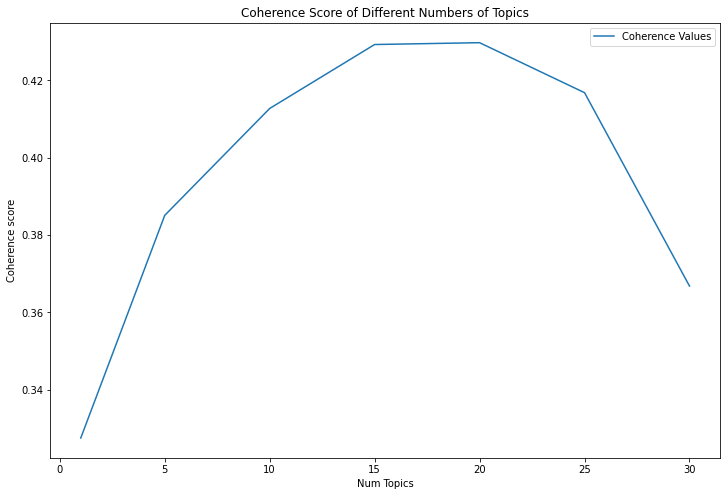

In [60]:
x=[1,5,10,15,20,25,30]
coherence_values=[ 0.3275670297976407,0.38508446420982845,0.41270130486423995,0.4292233839202749,0.42969646291854807,0.41678288615430814,0.36682846289825505]

plt.figure(figsize=(12,8))
plt.plot(x, coherence_values, label="Coherence Values")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.title("Coherence Score of Different Numbers of Topics")
plt.show()

##Determine paramters alpha and beta

In [61]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.01,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.007*"flashbots" + 0.004*"mev" + 0.002*"defi" + 0.002*"amm" + 0.002*"gt" + '
  '0.002*"miners" + 0.001*"week" + 0.001*"one" + 0.001*"running" + '
  '0.001*"bertcmiller"'),
 (1,
  '0.005*"flashbots" + 0.003*"mist" + 0.002*"mev" + 0.002*"uniswap" + '
  '0.002*"thegostep" + 0.002*"mistx" + 0.001*"utility" + 0.001*"project" + '
  '0.001*"something" + 0.001*"bcleaks"'),
 (2,
  '0.007*"flashbots" + 0.003*"mev" + 0.002*"eth" + 0.002*"today" + '
  '0.002*"research" + 0.002*"week" + 0.002*"mistx" + 0.002*"players" + '
  '0.001*"going" + 0.001*"forest"'),
 (3,
  '0.005*"flashbots" + 0.002*"protect" + 0.002*"mist" + 0.001*"mistxlabs" + '
  '0.001*"ethergal" + 0.001*"test" + 0.001*"bids" + 0.001*"thread" + '
  '0.001*"mev" + 0.001*"blockchain"'),
 (4,
  '0.002*"flashbots" + 0.001*"new" + 0.001*"eip" + 0.001*"trade" + 0.001*"eh" '
  '+ 0.001*"vg" + 0.001*"shill" + 0.001*"support" + 0.001*"shizzlebotz" + '
  '0.001*"artist"'),
 (5,
  '0.003*"flashbots" + 0.001*"step" + 0.001*"yes" + 0.001*"

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [62]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39454438246978446


In [63]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.017193 -0.014954       1        1  15.561965
11     0.017518  0.015005       2        1  13.696663
15     0.003384  0.000546       3        1   8.458921
2     -0.002093  0.000943       4        1   7.782238
0     -0.004233  0.002071       5        1   6.883815
18     0.000773 -0.001285       6        1   4.987398
16    -0.000840 -0.002250       7        1   4.449858
1     -0.000158  0.000722       8        1   4.213848
12    -0.003378  0.000458       9        1   4.084137
10    -0.001200  0.000572      10        1   4.035775
19    -0.000961 -0.001040      11        1   3.847040
8     -0.000028 -0.000043      12        1   3.664574
3     -0.002898 -0.000482      13        1   3.271648
9     -0.001732  0.000428      14        1   3.156015
5     -0.003850 -0.000538      15        1   2.814795
7     -0.004109  0.000287      16        1   2.622470
4     -0.003815 -0.000512      17        1   2.153160
6     -0.002596  0.000470      18        1   1.570769
13    -0.003784 -0.000035      19        1   1.564214
17    -0.003193 -0.000363      20        1   1.180697, topic_info=         Term       Freq      Total Category  logprob  loglift
176        gt   2.000000   2.000000  Default  30.0000  30.0000
119       eth   6.000000   6.000000  Default  29.0000  29.0000
30        mev  15.000000  15.000000  Default  28.0000  28.0000
255      mist  11.000000  11.000000  Default  27.0000  27.0000
590  ethereum   4.000000   4.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
77      video   0.047387   2.878770  Topic20  -6.9171   0.3323
147      team   0.045956   4.223149  Topic20  -6.9477  -0.0816
169       amm   0.042734   2.160102  Topic20  -7.0204   0.5161
255      mist   0.045956  11.682191  Topic20  -6.9477  -1.0991
471       set   0.042085   1.881195  Topic20  -7.0357   0.6391

[962 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
880       1  0.430327             al
251       1  0.227794      alchemist
251       2  0.227794      alchemist
1031      1  0.358311  alchemistcoin
19        1  0.350506        article
...     ...       ...            ...
949       2  0.266196           week
949       4  0.266196           week
1185      1  0.444990          weeks
234       1  0.303193           work
415       1  0.430352           ylpk

[147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 12, 16, 3, 1, 19, 17, 2, 13, 11, 20, 9, 4, 10, 6, 8, 5, 7, 14, 18])

In [64]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.3,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.008*"flashbots" + 0.003*"mev" + 0.002*"mist" + 0.002*"gt" + '
  '0.002*"mistxlabs" + 0.002*"amm" + 0.002*"one" + 0.002*"defi" + '
  '0.001*"front" + 0.001*"week"'),
 (1,
  '0.004*"flashbots" + 0.003*"mist" + 0.002*"mev" + 0.002*"uniswap" + '
  '0.001*"thegostep" + 0.001*"little" + 0.001*"something" + 0.001*"mistx" + '
  '0.001*"might" + 0.001*"bcleaks"'),
 (2,
  '0.008*"flashbots" + 0.003*"mev" + 0.002*"research" + 0.002*"eth" + '
  '0.002*"week" + 0.002*"today" + 0.002*"mistx" + 0.001*"protecc" + '
  '0.001*"ethergals" + 0.001*"way"'),
 (3,
  '0.005*"flashbots" + 0.001*"mev" + 0.001*"white" + 0.001*"hat" + '
  '0.001*"thread" + 0.001*"mist" + 0.001*"ethergal" + 0.001*"built" + '
  '0.001*"see" + 0.001*"test"'),
 (4,
  '0.002*"flashbots" + 0.001*"eip" + 0.001*"mev" + 0.001*"soon" + 0.001*"vg" + '
  '0.001*"lt" + 0.001*"portal" + 0.001*"zmciu" + 0.001*"forest" + 0.001*"sp"'),
 (5,
  '0.004*"flashbots" + 0.002*"gas" + 0.001*"mist" + 0.001*"huge" + '
  '0.001*"step" + 0.001*"wee

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [65]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4069205469028563


In [66]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.6,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.007*"flashbots" + 0.003*"mev" + 0.002*"mist" + 0.001*"eth" + '
  '0.001*"mistx" + 0.001*"new" + 0.001*"crucible" + 0.001*"ethereum" + '
  '0.001*"defi" + 0.001*"copper"'),
 (1,
  '0.006*"flashbots" + 0.003*"mev" + 0.003*"mist" + 0.001*"mistx" + '
  '0.001*"eth" + 0.001*"thegostep" + 0.001*"crucible" + 0.001*"copper" + '
  '0.001*"alchemist" + 0.001*"new"'),
 (2,
  '0.007*"flashbots" + 0.003*"mev" + 0.002*"mist" + 0.001*"eth" + '
  '0.001*"mistx" + 0.001*"crucible" + 0.001*"week" + 0.001*"copper" + '
  '0.001*"research" + 0.001*"community"'),
 (3,
  '0.006*"flashbots" + 0.002*"mev" + 0.002*"mist" + 0.001*"eth" + '
  '0.001*"copper" + 0.001*"alchemist" + 0.001*"crucible" + 0.001*"defi" + '
  '0.001*"mistx" + 0.001*"week"'),
 (4,
  '0.005*"flashbots" + 0.003*"mev" + 0.002*"mist" + 0.001*"mistx" + '
  '0.001*"eth" + 0.001*"copper" + 0.001*"ethereum" + 0.001*"thegostep" + '
  '0.001*"crucible" + 0.001*"new"'),
 (5,
  '0.006*"flashbots" + 0.002*"mist" + 0.002*"mev" + 0.001*"mistx" 

In [67]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.34222348483246084


In [68]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha="symmetric",eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.008*"flashbots" + 0.004*"mev" + 0.002*"defi" + 0.002*"dark" + '
  '0.002*"forest" + 0.002*"amm" + 0.002*"gt" + 0.001*"week" + 0.001*"miners" + '
  '0.001*"one"'),
 (1,
  '0.005*"flashbots" + 0.003*"mist" + 0.002*"uniswap" + 0.002*"mev" + '
  '0.002*"thegostep" + 0.002*"mistx" + 0.001*"something" + 0.001*"bcleaks" + '
  '0.001*"chicocrypto" + 0.001*"uni"'),
 (2,
  '0.007*"flashbots" + 0.003*"mev" + 0.002*"eth" + 0.002*"today" + '
  '0.002*"research" + 0.002*"week" + 0.002*"players" + 0.002*"mistx" + '
  '0.001*"subscribe" + 0.001*"way"'),
 (3,
  '0.005*"flashbots" + 0.002*"mist" + 0.002*"protect" + 0.001*"ethergal" + '
  '0.001*"test" + 0.001*"mistxlabs" + 0.001*"mev" + 0.001*"thread" + '
  '0.001*"bids" + 0.001*"see"'),
 (4,
  '0.002*"flashbots" + 0.001*"new" + 0.001*"eip" + 0.001*"trade" + 0.001*"eh" '
  '+ 0.001*"vg" + 0.001*"shizzlebotz" + 0.001*"us" + 0.001*"support" + '
  '0.001*"grow"'),
 (5,
  '0.003*"flashbots" + 0.002*"mist" + 0.001*"gas" + 0.001*"step" + '
  '0.001*

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [69]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3975147924010726


In [70]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.31,eta=0.61)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.011*"flashbots" + 0.003*"mev" + 0.003*"mist" + 0.002*"gt" + '
  '0.002*"mistxlabs" + 0.002*"amm" + 0.002*"one" + 0.002*"defi" + '
  '0.002*"front" + 0.001*"week"'),
 (1,
  '0.005*"flashbots" + 0.004*"mist" + 0.003*"mev" + 0.002*"uniswap" + '
  '0.002*"thegostep" + 0.002*"little" + 0.002*"something" + 0.002*"might" + '
  '0.002*"mistx" + 0.002*"bcleaks"'),
 (2,
  '0.011*"flashbots" + 0.004*"mev" + 0.003*"research" + 0.003*"eth" + '
  '0.002*"week" + 0.002*"today" + 0.002*"mistx" + 0.002*"protecc" + '
  '0.002*"ethergals" + 0.001*"way"'),
 (3,
  '0.007*"flashbots" + 0.002*"white" + 0.002*"hat" + 0.002*"mev" + '
  '0.002*"thread" + 0.002*"mist" + 0.002*"ethergal" + 0.001*"built" + '
  '0.001*"see" + 0.001*"test"'),
 (4,
  '0.003*"flashbots" + 0.002*"mev" + 0.001*"eip" + 0.001*"soon" + 0.001*"vg" + '
  '0.001*"crypto" + 0.001*"video" + 0.001*"lt" + 0.001*"approaches" + '
  '0.001*"timestamp"'),
 (5,
  '0.006*"flashbots" + 0.002*"gas" + 0.002*"mist" + 0.002*"huge" + '
  '0.001*"st

In [71]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41016986398266153


In [72]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha="symmetric",eta=0.31)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.018*"flashbots" + 0.009*"mev" + 0.004*"dark" + 0.004*"defi" + '
  '0.004*"forest" + 0.004*"gt" + 0.004*"amm" + 0.003*"week" + 0.003*"miners" + '
  '0.003*"one"'),
 (1,
  '0.011*"flashbots" + 0.007*"mist" + 0.004*"uniswap" + 0.004*"mev" + '
  '0.004*"thegostep" + 0.003*"mistx" + 0.003*"something" + 0.003*"little" + '
  '0.003*"might" + 0.003*"chicocrypto"'),
 (2,
  '0.016*"flashbots" + 0.006*"mev" + 0.005*"eth" + 0.004*"today" + '
  '0.004*"research" + 0.004*"week" + 0.004*"players" + 0.003*"mistx" + '
  '0.002*"subscribe" + 0.002*"protecc"'),
 (3,
  '0.012*"flashbots" + 0.005*"mist" + 0.005*"protect" + 0.003*"ethergal" + '
  '0.003*"mistxlabs" + 0.003*"test" + 0.003*"mev" + 0.003*"thread" + '
  '0.002*"bids" + 0.002*"see"'),
 (4,
  '0.005*"flashbots" + 0.003*"new" + 0.003*"eip" + 0.002*"trade" + 0.002*"eh" '
  '+ 0.002*"vg" + 0.002*"grow" + 0.002*"cfiaxgvjbk" + 0.002*"support" + '
  '0.002*"artist"'),
 (5,
  '0.008*"flashbots" + 0.004*"mist" + 0.003*"gas" + 0.003*"step" + '
 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [73]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4004248438493474


##Network

The words in cleaned tweets are paired up by their co-occurrence across the tweets. A counter is defined to capture the top 50 co-occurrence frequency. We choose Python package NetworkX for visualizing this weighted graph. Each node represents a word, each edge represents a connection between words co-occurrence,  and the thickness of edges depicts is absolute frequency of the occurrence of word-word pair. 


In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [76]:
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens
def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
df_mev2

In [78]:
tweets_no_urls = [remove_url(tweet) for tweet in df_mev2.paper_text_processed]
# Create list of lists containing bigrams in tweets
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ["marquem","m脕ximo","abaixo","colem","u","e","#mev聽","poss脥veis",'馃槩',"&amp;","脕","脥","鈥檛","鈥檙", "鈥檚",'from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"]
lemmatizer=WordNetLemmatizer()
tweets_nsw_nc = [[lemmatizer.lemmatize(w) for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df_mev = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

bigram_df_mev

bigram  count
0               (extractable, value)     22
1                 (#mev, #flashbots)     16
2                     (macri, macri)     15
3               (miner, extractable)     13
4                   (front, running)     13
5               (#consentidxs, #mev)     13
6                      (#defi, #mev)     12
7                       (#cpb, #mev)     11
8                             (💜, 💜)     10
9                   (#mev, solution)      9
10                 (smart, contract)      9
11                (#flashbots, #mev)      9
12                 (#mev, #ethereum)      8
13              (#prinsjesdag, #mev)      8
14                  (#macri, #macri)      8
15                     (stay, tuned)      7
16                       (#mh, #mev)      7
17             (#mev, #mehwishhayat)      7
18             (extractable, value))      7
19                     (#mev, #defi)      7
20                     (sobre, #mev)      7
21                      (look, like)      6
22                  (solution, #mev)      6
23                       (del, #mev)      6
24                  (#crypto, #defi)      6
25              (level, #domainname)      6
26                (sandwich, attack)      5
27                (💜, @mehwishhayat)      5
28                (@mehwishhayat, 💜)      5
29                          (💜, #mh)      5
30                (#mehwishhayat, 💜)      5
31              (💜, #mehwishhsource)      5
32                      (#mev, $eth)      5
33             (#frontrunning, #mev)      5
34                   (#mev, #crypto)      5
35                       ($mist, ⚗️)      5
36                         (join, u)      5
37                (fair, sequencing)      5
38             (sequencing, service)      5
39                     (#mev, front)      5
40               ($7600, phenomenal)      5
41                 (phenomenal, top)      5
42                      (top, level)      5
43               (#domainname, sale)      5
44                      (sale, #mev)      5
45          (#mev, #machinelearning)      5
46  (#machinelearning, #datascience)      5
47           (#datascience, #python)      5
48                    (#python, #ai)      5
49             (#ai, #100daysofcode)      5

In [80]:
bigram_df_mev.to_csv("mev_network.csv")

In [81]:
tweets_no_urls = [remove_url(tweet) for tweet in df_flashbots.paper_text_processed]
# Create list of lists containing bigrams in tweets
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ["marquem","m脕ximo","abaixo","colem","u","e","#mev聽","poss脥veis",'馃槩',"&amp;","脕","脥","鈥檛","鈥檙", "鈥檚",'from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"]
lemmatizer=WordNetLemmatizer()
tweets_nsw_nc = [[lemmatizer.lemmatize(w) for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df_flashbots = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])
bigram_df_flashbots

In [83]:
bigram_df_flashbots.to_csv("flashbots_network.csv")

In [ ]:
llll = pd.read_csv('/content/flashbots_MEV_network.csv')
llll

In [88]:
# Create dictionary of bigrams and their counts
d = bigram_df_mev.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/1000)
G.remove_nodes_from(["pfv", "tag"])

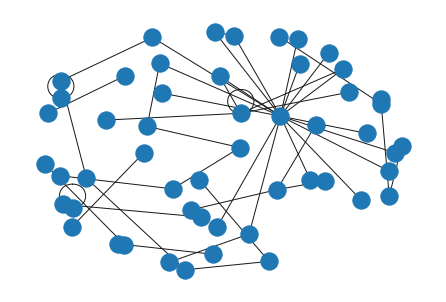

In [89]:
nx.draw(G)

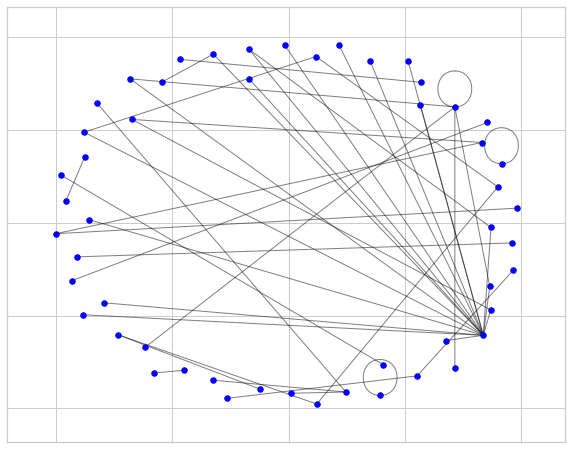

In [90]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=10)
node_options = {"node_color": "blue", "node_size": 30}
edge_options = {"width": 1, "alpha": .5, "edge_color": "black"}
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
plt.show()

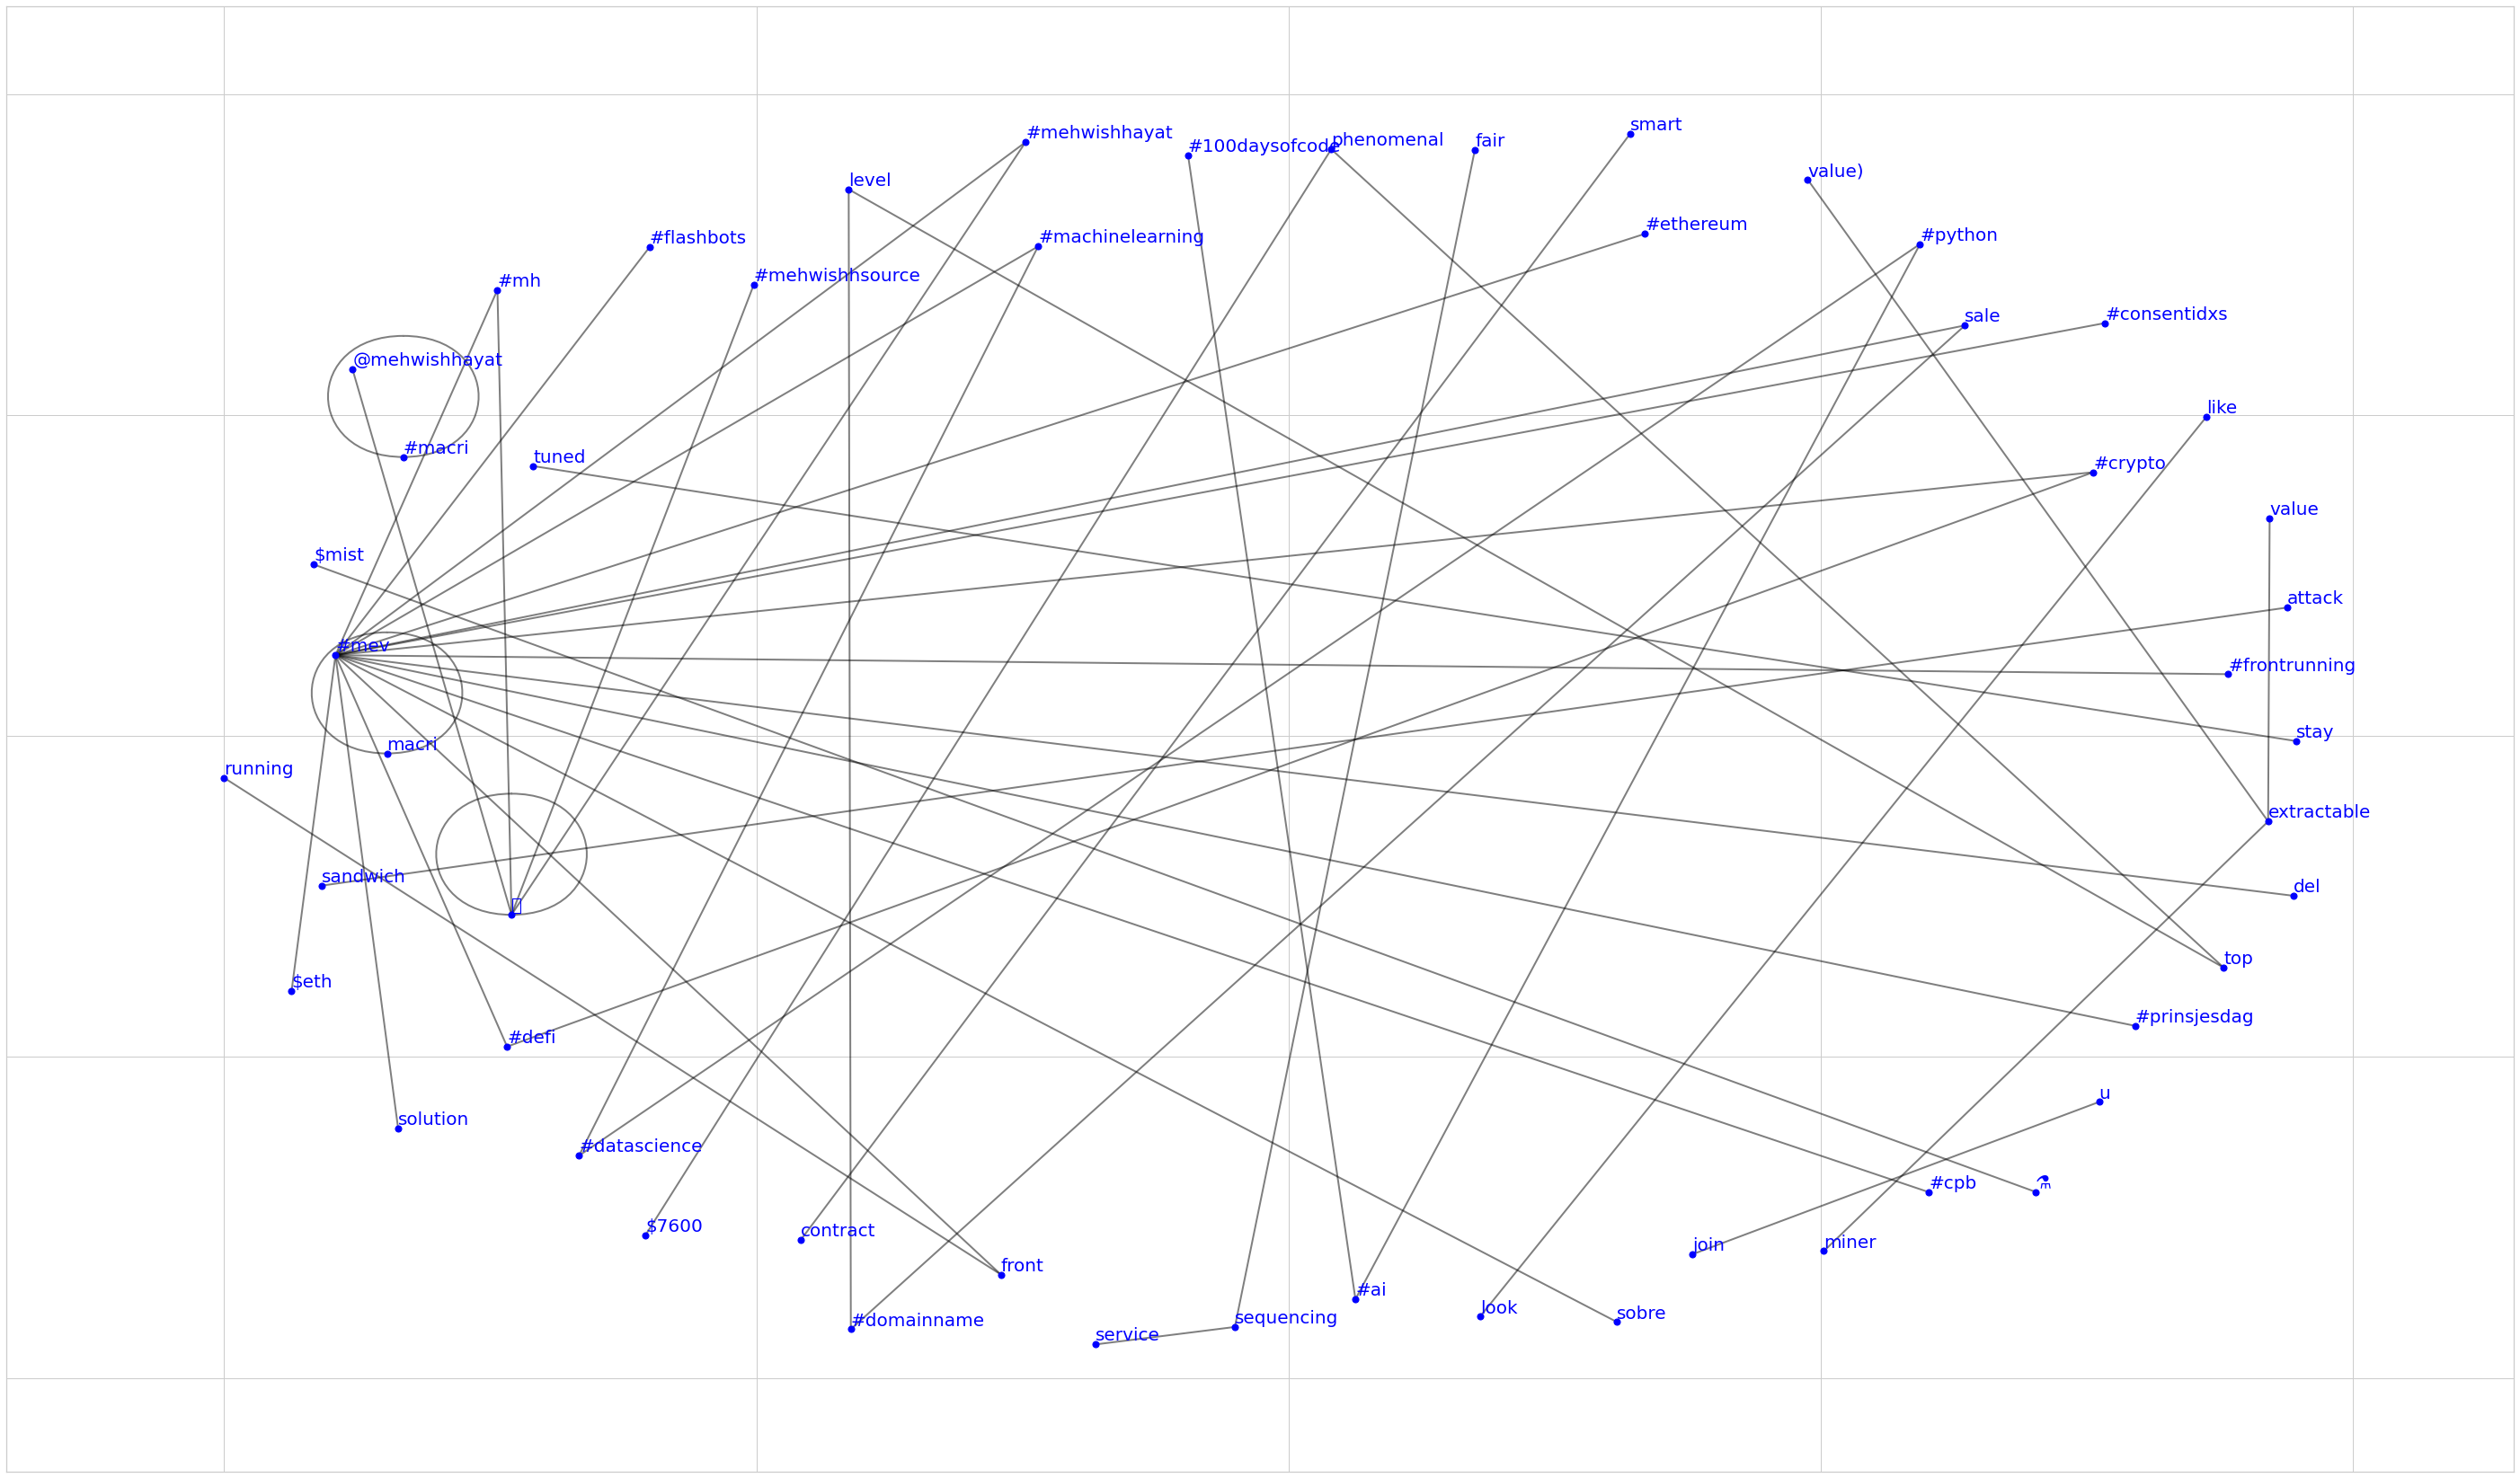

In [99]:
plt.figure(figsize=(50,30))
pos = nx.spring_layout(G, k=10)
node_options = {"node_color": "blue", "node_size": 50}
edge_options = {"width": 2, "alpha": .5, "edge_color": "black"}
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
node_label_options = {"font_size":20,
                      "font_color": "blue",
                      "verticalalignment":"bottom",
                      "horizontalalignment":"left"}
nx.draw_networkx_labels(G,pos,**node_label_options)

plt.show()

In [100]:
# Create dictionary of bigrams and their counts
d2 = bigram_df_flashbots.set_index('bigram').T.to_dict('records')
# Create network plot 
G2 = nx.Graph()
# Create connections between nodes
for k, v in d2[0].items():
    G2.add_edge(k[0], k[1], weight=v/1000)
G2.remove_nodes_from(["pfv", "tag"])

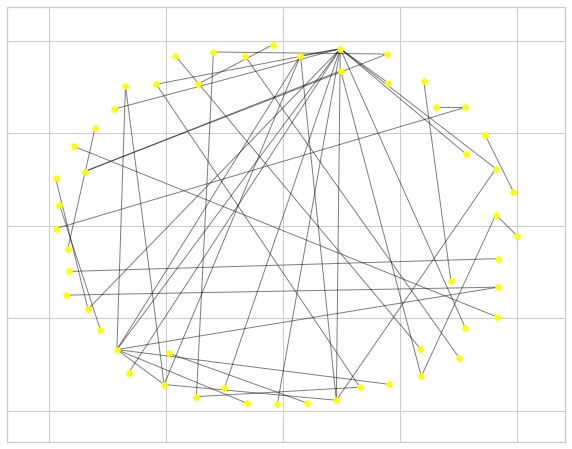

In [101]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G2, k=10)
node_options = {"node_color": "yellow", "node_size": 30}
edge_options = {"width": 1, "alpha": .5, "edge_color": "black"}
nx.draw_networkx_nodes(G2, pos, **node_options)
nx.draw_networkx_edges(G2, pos, **edge_options)
plt.show()

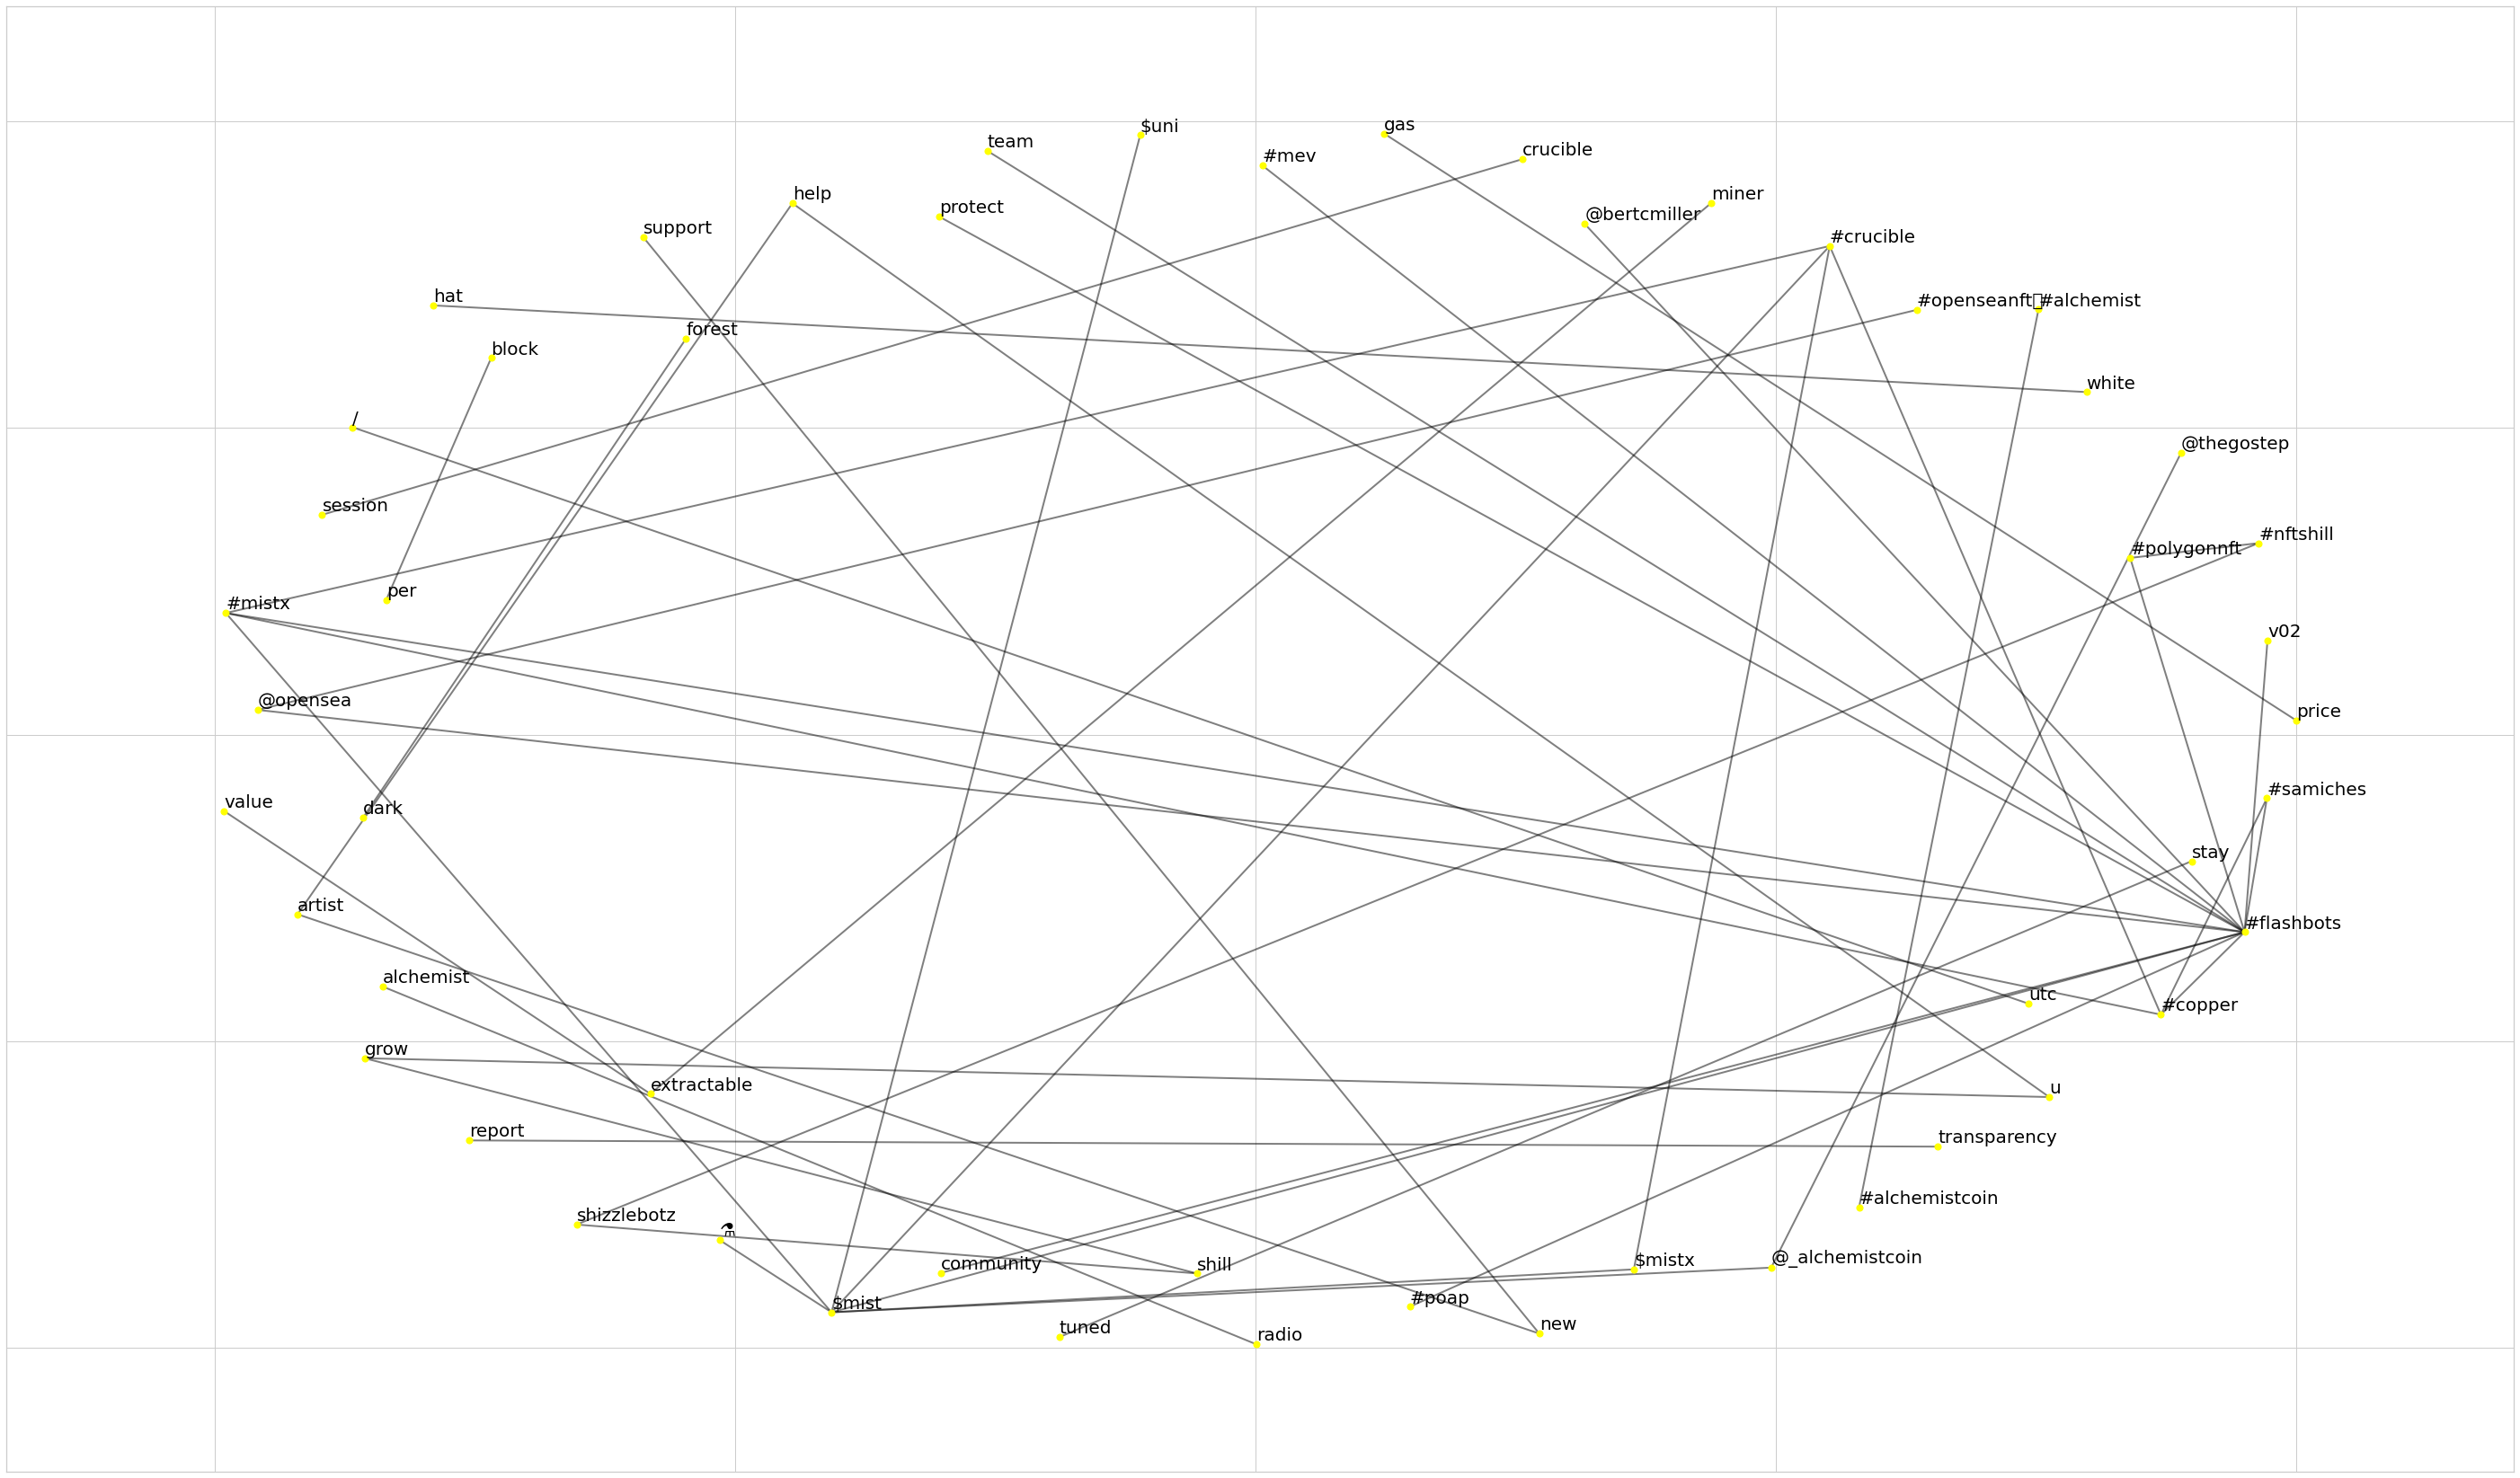

In [102]:
plt.figure(figsize=(50,30))
pos = nx.spring_layout(G2, k=10)
node_options = {"node_color": "yellow", "node_size": 50}
edge_options = {"width": 2, "alpha": .5, "edge_color": "black"}
nx.draw_networkx_nodes(G2, pos, **node_options)
nx.draw_networkx_edges(G2, pos, **edge_options)
node_label_options = {"font_size":20,
                      "font_color": "black",
                      "verticalalignment":"bottom",
                      "horizontalalignment":"left"}
nx.draw_networkx_labels(G2,pos,**node_label_options)

plt.show()